# 라이브러리

In [ ]:
import pandas as pd
import numpy as np
from dataset import Dataset
from dataread import Dataread
import seaborn as sns
import matplotlib.pyplot as plt


from dateutil.parser import parse
import json
from collections import Counter
import matplotlib.dates as mdates

from statsmodels.stats.power import TTestIndPower
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy.stats import pearsonr


sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

ds = Dataset()
dr = Dataread()
JSON_KEY_PATH = "./sprintda05-soomin.json"


# 데이터 EDA

## 기초 정보 확인

In [2]:
def baseinfo(df):
    print(df.shape)
    display(df.isna().sum())
    display(df.head(6))
    return

In [3]:
hackle_files = ds.hackle.file_list()
datapath = "gs://final-project-soomin/final_project/hackle"
for file in hackle_files:
    file_path = f"{datapath}/{file}.parquet"
    df = pd.read_parquet(file_path,
                         engine = "pyarrow",
                        storage_options= {"token": JSON_KEY_PATH})
    
    print(file)
    baseinfo(df)
    try:
        print(f'''
min : {df['event_datetime'].min()}
max : {df['event_datetime'].max()}
''')
    except:
        print("\n No 'event_datetime' column found. \n")
        df.info()
    print("\n" + "=" * 50 + "=" * 50 + "\n\n")

del datapath, df, file_path, hackle_files

device_properties
(252380, 4)


id               0
device_id        0
device_model     0
device_vendor    0
dtype: int64

,id,device_id,device_model,device_vendor
0,1,000007C9-E103-4EB5-9777-A9084D4952DF,"iPhone14,7",Apple
1,2,00002245-458F-4CDD-8533-B448CD43DBD2,"iPhone14,7",Apple
2,3,00012620-313A-4502-9F8D-8DAB7443215B,"iPhone14,5",Apple
3,4,000137bc-80de-4bb5-b61d-df7f217a4501,SM-F711N,samsung
4,5,000227D6-B782-4367-91C4-486B76DF9E37,"iPhone12,3",Apple
5,6,00025EE1-BA46-4853-8FDD-B991FABA328F,"iPhone12,8",Apple



 No 'event_datetime' column found. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252380 entries, 0 to 252379
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             252380 non-null  int64 
 1   device_id      252380 non-null  object
 2   device_model   252380 non-null  object
 3   device_vendor  252380 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.7+ MB



hackle_events
(11441319, 11)


event_id                 0
event_datetime           0
event_key                0
session_id               0
id                       0
item_name                0
page_name                0
friend_count        752556
votes_count         754554
heart_balance       728643
question_id       10991835
dtype: int64

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,00000533-3f1c-4b3b-81f1-0c8f35754b4e,,,NaN,NaN,NaN,NaN
1,00000716-27e9-4e72-a602-d0ce61784b06,2023-07-18 21:07:24,click_question_open,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,00000716-27e9-4e72-a602-d0ce61784b06,,,64.0,436.0,4830.0,NaN
2,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,2023-08-06 20:18:03,click_bottom_navigation_profile,6bcea65d-9f40-46fc-888c-700fe707483f,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,,,26.0,174.0,4729.0,NaN
3,00000981-5e2a-4111-993e-4f1891ad9a53,2023-08-05 01:46:10,view_shop,XVYNT6zfhFWqIg9omwg2AHDjTLx2,00000981-5e2a-4111-993e-4f1891ad9a53,,,61.0,44.0,142.0,NaN
4,00000a7a-ba72-4332-b4a9-7910670aaeb2,2023-07-24 15:03:37,click_bottom_navigation_lab,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,00000a7a-ba72-4332-b4a9-7910670aaeb2,,,119.0,545.0,3287.0,NaN
5,00000bfa-93ff-41d0-9b3a-c59ca76c0599,2023-07-29 18:39:10,$session_end,LztzUUFoRxdqTSPgQrX3MAAyNkM2,00000bfa-93ff-41d0-9b3a-c59ca76c0599,,,NaN,NaN,NaN,NaN



min : 2023-07-18 00:00:00
max : 2023-08-10 23:59:59




hackle_properties
(525350, 8)


id             0
session_id     0
user_id        0
language       0
osname         0
osversion      0
versionname    0
device_id      0
dtype: int64

,id,session_id,user_id,language,osname,osversion,versionname,device_id
0,1,4OzYh3seq3VKytpSn5pvQkZNQii1,,ko-KR,iOS,16.0,2.0.0,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74
1,2,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,1046711,ko-KR,iOS,16.5.1,2.0.3,D5417226-F71B-4A9E-A180-CD072F2AB279
2,3,6bcea65d-9f40-46fc-888c-700fe707483f,1545130,ko,Android,13,2.0.5,6bcea65d-9f40-46fc-888c-700fe707483f
3,4,XVYNT6zfhFWqIg9omwg2AHDjTLx2,1224793,ko,Android,13,2.0.5,a05c1595-3e05-434b-8684-218b528bd725
4,5,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,1329450,ko-US,iOS,16.5.1,2.0.5,EAC6C0B3-7CE8-40EA-8A91-9977C0BA5EF3
5,6,LztzUUFoRxdqTSPgQrX3MAAyNkM2,LztzUUFoRxdqTSPgQrX3MAAyNkM2,ko-KR,iOS,16.1,2.0.5,3F199073-9390-4137-B0B0-0DC4FC103009



 No 'event_datetime' column found. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525350 entries, 0 to 525349
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           525350 non-null  int64 
 1   session_id   525350 non-null  object
 2   user_id      525350 non-null  object
 3   language     525350 non-null  object
 4   osname       525350 non-null  object
 5   osversion    525350 non-null  object
 6   versionname  525350 non-null  object
 7   device_id    525350 non-null  object
dtypes: int64(1), object(7)
memory usage: 32.1+ MB



merged_hackle
(11507966, 22)


event_id                 0
event_datetime           0
event_key                0
session_id               0
item_name                0
page_name                0
friend_count        754553
votes_count         756551
heart_balance       730505
question_id       11054777
device_id                0
device_model             0
device_vendor            0
user_id                  0
language                 0
osname                   0
osversion                0
versionname              0
class                71964
gender               71964
grade                71964
school_id            71964
dtype: int64

,event_id,event_datetime,event_key,session_id,item_name,page_name,friend_count,votes_count,heart_balance,question_id,...,device_vendor,user_id,language,osname,osversion,versionname,class,gender,grade,school_id
0,0,2023-07-18 19:40:17,$session_start,31496,,,NaN,NaN,NaN,NaN,...,Apple,1041414,ko-KR,iOS,16.0,2.0.5,9.0,F,2.0,2173.0
1,1,2023-07-18 21:07:24,click_question_open,58873,,,64.0,436.0,4830.0,NaN,...,Apple,1046711,ko-KR,iOS,16.5.1,2.0.3,2.0,F,2.0,1737.0
2,2,2023-08-06 20:18:03,click_bottom_navigation_profile,45897,,,26.0,174.0,4729.0,NaN,...,samsung,1545130,ko,Android,13,2.0.5,2.0,M,1.0,1141.0
3,3,2023-08-05 01:46:10,view_shop,155122,,,61.0,44.0,142.0,NaN,...,samsung,1224793,ko,Android,13,2.0.5,6.0,F,3.0,1824.0
4,4,2023-07-24 15:03:37,click_bottom_navigation_lab,154274,,,119.0,545.0,3287.0,NaN,...,Apple,1329450,ko-US,iOS,16.5.1,2.0.5,6.0,F,3.0,187.0
5,5,2023-07-29 18:39:10,$session_end,119060,,,NaN,NaN,NaN,NaN,...,Apple,1344205,ko-KR,iOS,16.1,2.0.5,6.0,M,1.0,2460.0



min : 2023-07-18 00:00:00
max : 2023-08-10 23:59:59




user_properties
(230819, 5)


user_id      0
class        0
gender       0
grade        0
school_id    0
dtype: int64

,user_id,class,gender,grade,school_id
0,1000000,1,M,1,1885
1,1000009,10,F,2,3869
2,1000012,10,F,1,5091
3,1000013,8,F,2,1743
4,1000015,2,F,3,5078
5,1000018,2,F,3,2523



 No 'event_datetime' column found. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230819 entries, 0 to 230818
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    230819 non-null  object
 1   class      230819 non-null  int64 
 2   gender     230819 non-null  object
 3   grade      230819 non-null  int64 
 4   school_id  230819 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 8.8+ MB





In [4]:
votes_files = ds.votes.file_list()
datapath = "gs://final-project-soomin/final_project/votes"
for file in votes_files:
    file_path = f"{datapath}/{file}.parquet"
    df = pd.read_parquet(file_path,
                        engine = "pyarrow",
                        storage_options= {"token": JSON_KEY_PATH})
    print(file)
    baseinfo(df)
    try:
        print(f'''
min : {df['created_at'].min()}
max : {df['created_at'].max()}
''')
    except:
        print("\n No 'created_at' column in this DataFrame. \n")
    df.info()
    print("\n" + "=" * 50 + "=" * 50 + "\n\n")
    
del datapath, df, file_path, votes_files

accounts_attendance
(349637, 3)


id                      0
attendance_date_list    0
user_id                 0
dtype: int64

,id,attendance_date_list,user_id
0,1,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1446852
1,2,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1359398
2,3,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1501542
3,4,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1507767
4,5,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1287453
5,6,"[""2023-05-29"", ""2023-05-30"", ""2023-06-01"", ""20...",1394716



 No 'created_at' column in this DataFrame. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349637 entries, 0 to 349636
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    349637 non-null  int64 
 1   attendance_date_list  349637 non-null  object
 2   user_id               349637 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.0+ MB



accounts_blockrecord
(19482, 5)


id               0
reason           0
created_at       0
block_user_id    0
user_id          0
dtype: int64

,id,reason,created_at,block_user_id,user_id
0,1,그냥...,2023-05-04 23:01:53,867483,878476
1,2,친구 사이가 어색해짐,2023-05-05 01:17:08,867190,867564
2,3,나랑 관련 없는 질문을 자꾸 보냄,2023-05-05 01:50:55,875110,875261
3,6,그냥...,2023-05-05 05:21:52,883696,883511
4,7,그냥...,2023-05-05 06:40:34,871349,870177
5,8,기타,2023-05-05 10:23:15,846967,880109



min : 2023-05-04 23:01:53
max : 2024-05-06 13:03:37

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19482 entries, 0 to 19481
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19482 non-null  int64         
 1   reason         19482 non-null  object        
 2   created_at     19482 non-null  datetime64[ns]
 3   block_user_id  19482 non-null  int64         
 4   user_id        19482 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 761.1+ KB



accounts_failpaymenthistory
(163, 5)


id              0
productId     107
phone_type      0
created_at      0
user_id         0
dtype: int64

,id,productId,phone_type,created_at,user_id
0,6,heart.200,A,2023-05-14 05:49:22,1055891
1,7,heart.777,A,2023-05-14 08:17:21,1152151
2,8,heart.777,A,2023-05-14 10:11:46,986200
3,9,heart.1000,A,2023-05-14 11:53:09,1028261
4,10,heart.777,A,2023-05-14 12:30:47,1235730
5,11,heart.777,A,2023-05-14 14:17:32,1039257



min : 2023-05-14 05:49:22
max : 2023-09-17 09:12:53

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          163 non-null    int64         
 1   productId   56 non-null     object        
 2   phone_type  163 non-null    object        
 3   created_at  163 non-null    datetime64[ns]
 4   user_id     163 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 6.5+ KB



accounts_friendrequest
(17147175, 6)


id                 0
status             0
created_at         0
updated_at         0
receive_user_id    0
send_user_id       0
dtype: int64

,id,status,created_at,updated_at,receive_user_id,send_user_id
0,7,P,2023-04-17 18:29:11,2023-04-17 18:29:11,831962,837521
1,10,A,2023-04-17 18:29:11,2023-04-22 06:02:53,832151,837521
2,11,A,2023-04-17 18:29:11,2023-04-18 19:28:41,832340,837521
3,13,A,2023-04-17 18:29:11,2023-04-19 11:05:04,833041,837521
4,20,P,2023-04-17 18:29:11,2023-04-17 18:29:11,834415,837521
5,21,P,2023-04-17 18:29:11,2023-04-17 18:29:11,834486,837521



min : 2023-04-17 18:29:11
max : 2024-05-09 09:21:47

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17147175 entries, 0 to 17147174
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   status           object        
 2   created_at       datetime64[ns]
 3   updated_at       datetime64[ns]
 4   receive_user_id  int64         
 5   send_user_id     int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 784.9+ MB



accounts_group
(84515, 4)


id           0
grade        0
class_num    0
school_id    0
dtype: int64

,id,grade,class_num,school_id
0,1,1,1,1
1,8,3,2,1
2,9,3,3,1
3,10,2,2,1
4,11,2,3,1
5,12,2,1,1



 No 'created_at' column in this DataFrame. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84515 entries, 0 to 84514
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         84515 non-null  int64
 1   grade      84515 non-null  int64
 2   class_num  84515 non-null  int64
 3   school_id  84515 non-null  int64
dtypes: int64(4)
memory usage: 2.6 MB



accounts_nearbyschool
(59500, 4)


id                  0
distance            0
nearby_school_id    0
school_id           0
dtype: int64

,id,distance,nearby_school_id,school_id
0,119021,0.004564,6,7
1,119022,0.010787,13,7
2,119023,0.012928,20,7
3,119024,0.013590,4,7
4,119025,0.014122,24,7
5,119026,0.014774,25,7



 No 'created_at' column in this DataFrame. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59500 entries, 0 to 59499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                59500 non-null  int64  
 1   distance          59500 non-null  float64
 2   nearby_school_id  59500 non-null  int64  
 3   school_id         59500 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.8 MB



accounts_paymenthistory
(95140, 5)


id            0
productId     0
phone_type    0
created_at    0
user_id       0
dtype: int64

,id,productId,phone_type,created_at,user_id
0,6,heart.777,A,2023-05-13 21:28:34,1211127
1,7,heart.777,A,2023-05-13 21:29:39,1151343
2,8,heart.777,A,2023-05-13 21:31:33,1002147
3,9,heart.777,A,2023-05-13 21:31:39,1095040
4,11,heart.777,A,2023-05-13 21:34:32,1164081
5,12,heart.200,A,2023-05-13 21:39:06,1239225



min : 2023-05-13 21:28:34
max : 2024-05-08 14:12:45

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95140 entries, 0 to 95139
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          95140 non-null  int64         
 1   productId   95140 non-null  object        
 2   phone_type  95140 non-null  object        
 3   created_at  95140 non-null  datetime64[ns]
 4   user_id     95140 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.6+ MB



accounts_pointhistory
(2338918, 5)


id                            0
delta_point                   0
created_at                    0
user_id                       0
user_question_record_id    2992
dtype: int64

,id,delta_point,created_at,user_id,user_question_record_id
0,790629,9,2023-04-28 12:27:49,849436,771777.0
1,790652,9,2023-04-28 12:28:02,849436,771800.0
2,790664,5,2023-04-28 12:28:09,849436,771812.0
3,790680,13,2023-04-28 12:28:16,849436,771828.0
4,790703,5,2023-04-28 12:28:26,849436,771851.0
5,790716,10,2023-04-28 12:28:32,849436,771864.0



min : 2023-04-28 12:27:49
max : 2024-05-08 01:36:18

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338918 entries, 0 to 2338917
Data columns (total 5 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   id                       int64         
 1   delta_point              int64         
 2   created_at               datetime64[ns]
 3   user_id                  int64         
 4   user_question_record_id  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 89.2 MB



accounts_school
(5951, 4)


id               0
address          0
student_count    0
school_type      0
dtype: int64

,id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,5,충청북도 충주시,160,M
2,6,충청북도 충주시,200,H
3,7,충청북도 충주시,114,H
4,8,충청북도 충주시,139,M
5,9,충청북도 충주시,3,H



 No 'created_at' column in this DataFrame. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5951 entries, 0 to 5950
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             5951 non-null   int64 
 1   address        5951 non-null   object
 2   student_count  5951 non-null   int64 
 3   school_type    5951 non-null   object
dtypes: int64(2), object(2)
memory usage: 186.1+ KB



accounts_timelinereport
(208, 6)


id                         0
reason                     0
created_at                 0
reported_user_id           0
user_id                    0
user_question_record_id    0
dtype: int64

,id,reason,created_at,reported_user_id,user_id,user_question_record_id
0,28,타인을 사칭함,2023-05-06 04:44:57,874587,885082,3920588
1,37,친구를 비하하거나 조롱하는 어투,2023-05-06 05:41:19,881048,881298,4018679
2,46,친구를 비하하거나 조롱하는 어투,2023-05-06 06:26:59,887882,881945,4120914
3,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049
4,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049
5,73,허위 사실 언급,2023-05-06 07:24:39,884536,895569,4198891



min : 2023-05-06 04:44:57
max : 2023-06-02 08:30:06

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       208 non-null    int64         
 1   reason                   208 non-null    object        
 2   created_at               208 non-null    datetime64[ns]
 3   reported_user_id         208 non-null    int64         
 4   user_id                  208 non-null    int64         
 5   user_question_record_id  208 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 9.9+ KB



accounts_user
(677085, 16)


id                    0
is_superuser          0
is_staff              0
gender                2
point                 0
friend_id_list        0
is_push_on            0
created_at            0
block_user_id_list    0
hide_user_id_list     0
ban_status            0
report_count          0
alarm_count           0
pending_chat          0
pending_votes         0
group_id              3
dtype: int64

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0
5,832614,0,0,M,1048,"[838541, 833041, 832151, 837806, 1437874, 1142...",1,2023-03-29 12:56:35.064406,[],[],N,0,28,0,14,12.0



min : 2023-03-29 03:44:14.047130
max : 2024-05-09 08:31:17.710824

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677085 entries, 0 to 677084
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  677085 non-null  int64         
 1   is_superuser        677085 non-null  int64         
 2   is_staff            677085 non-null  int64         
 3   gender              677083 non-null  object        
 4   point               677085 non-null  int64         
 5   friend_id_list      677085 non-null  object        
 6   is_push_on          677085 non-null  int64         
 7   created_at          677085 non-null  datetime64[ns]
 8   block_user_id_list  677085 non-null  object        
 9   hide_user_id_list   677085 non-null  object        
 10  ban_status          677085 non-null  object        
 11  report_count        677085 non-null  int64         
 12  alarm_count       

id                     0
contacts_count         0
invite_user_id_list    0
user_id                0
dtype: int64

,id,contacts_count,invite_user_id_list,user_id
0,259,30,[],1167696
1,1756,79,[],863169
2,13742,21,[854615],857205
3,13754,29,[],851431
4,13756,28,[849318],855476
5,13784,31,[855829],1482744



 No 'created_at' column in this DataFrame. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   5063 non-null   int64 
 1   contacts_count       5063 non-null   int64 
 2   invite_user_id_list  5063 non-null   object
 3   user_id              5063 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 158.3+ KB



accounts_userquestionrecord
(1217558, 12)


id                   0
status               0
created_at           0
chosen_user_id       0
question_id          0
user_id              0
question_piece_id    0
has_read             0
answer_status        0
answer_updated_at    0
report_count         0
opened_times         0
dtype: int64

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0
5,771864,C,2023-04-28 12:28:32,849670,239,849436,998463,0,N,2023-04-28 12:28:32,0,0



min : 2023-04-28 12:27:49
max : 2024-05-08 01:36:18

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217558 entries, 0 to 1217557
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1217558 non-null  int64         
 1   status             1217558 non-null  object        
 2   created_at         1217558 non-null  datetime64[ns]
 3   chosen_user_id     1217558 non-null  int64         
 4   question_id        1217558 non-null  int64         
 5   user_id            1217558 non-null  int64         
 6   question_piece_id  1217558 non-null  int64         
 7   has_read           1217558 non-null  int64         
 8   answer_status      1217558 non-null  object        
 9   answer_updated_at  1217558 non-null  datetime64[ns]
 10  report_count       1217558 non-null  int64         
 11  opened_times       1217558 non-null  int64         
dtypes: datetime64[ns](2), int64(8)

id            0
reason        0
created_at    0
dtype: int64

,id,reason,created_at
0,42,재밌는 질문이 없어서,2023-03-29 13:22:12
1,43,함께 할 친구가 없어서,2023-03-29 13:24:59
2,44,함께 할 친구가 없어서,2023-03-29 13:53:32
3,45,함께 할 친구가 없어서,2023-03-29 13:54:03
4,46,재밌는 질문이 없어서,2023-03-30 00:31:19
5,47,기타 이유,2023-03-30 00:34:23



min : 2023-03-29 13:22:12
max : 2024-05-09 08:49:06

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70764 entries, 0 to 70763
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          70764 non-null  int64         
 1   reason      70764 non-null  object        
 2   created_at  70764 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ MB



event_receipts
(309, 5)


id            0
created_at    0
event_id      0
user_id       0
plus_point    0
dtype: int64

,id,created_at,event_id,user_id,plus_point
0,2,2023-06-22 09:25:16,1,1193618,500
1,3,2023-06-22 09:38:53,1,928351,500
2,4,2023-06-22 10:32:15,1,904872,500
3,5,2023-06-22 13:03:06,1,974697,500
4,6,2023-06-22 13:40:38,1,1168260,500
5,8,2023-06-22 14:38:39,1,1190259,500



min : 2023-06-22 09:25:16
max : 2023-11-21 12:03:02

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          309 non-null    int64         
 1   created_at  309 non-null    datetime64[ns]
 2   event_id    309 non-null    int64         
 3   user_id     309 non-null    int64         
 4   plus_point  309 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 12.2 KB



events
(3, 6)


id            0
title         0
plus_point    0
event_type    0
is_expired    0
created_at    0
dtype: int64

,id,title,plus_point,event_type,is_expired,created_at
0,1,코드잇 은행 가입 이벤트,500,FCFS,1,2023-06-20 11:56:38
1,2,코드잇 멤버십 가입 이벤트,1000,FCFS,1,2023-08-08 07:43:45
2,3,예고 영상 기대평 이벤트,500,FCFS,1,2023-09-24 17:05:59



min : 2023-06-20 11:56:38
max : 2023-09-24 17:05:59

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          3 non-null      int64         
 1   title       3 non-null      object        
 2   plus_point  3 non-null      int64         
 3   event_type  3 non-null      object        
 4   is_expired  3 non-null      int64         
 5   created_at  3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 276.0+ bytes



polls_question
(5025, 3)


id               0
question_text    0
created_at       0
dtype: int64

,id,question_text,created_at
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53
1,100,"""이 사람으로 한 번 살아보고 싶다"" 하는 사람은?",2023-03-31 15:22:53
2,101,미래의 틱톡커는?,2023-03-31 15:22:54
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55
5,104,내 어깨를 내어줄 수 있는 사람은?,2023-03-31 15:22:56



min : 2023-03-31 15:22:53
max : 2023-06-06 06:15:52

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             5025 non-null   int64         
 1   question_text  5025 non-null   object        
 2   created_at     5025 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 117.9+ KB



polls_questionpiece
(1265476, 5)


id             0
is_voted       0
created_at     0
question_id    0
is_skipped     0
dtype: int64

,id,is_voted,created_at,question_id,is_skipped
0,998458,1,2023-04-28 12:27:22,252,0
1,998459,1,2023-04-28 12:27:22,244,0
2,998460,1,2023-04-28 12:27:22,183,0
3,998461,1,2023-04-28 12:27:22,101,0
4,998462,1,2023-04-28 12:27:22,209,0
5,998463,1,2023-04-28 12:27:22,239,0



min : 2023-04-28 12:27:22
max : 2024-05-07 11:32:30

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265476 entries, 0 to 1265475
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1265476 non-null  int64         
 1   is_voted     1265476 non-null  int64         
 2   created_at   1265476 non-null  datetime64[ns]
 3   question_id  1265476 non-null  int64         
 4   is_skipped   1265476 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 48.3 MB



polls_questionreport
(51424, 5)


id             0
reason         0
created_at     0
question_id    0
user_id        0
dtype: int64

,id,reason,created_at,question_id,user_id
0,1,이 질문은 재미없어요,2023-04-19 06:20:35,250,837556
1,2,이 질문은 재미없어요,2023-04-19 06:58:09,113,837672
2,3,불쾌한 내용이 포함되어 있음,2023-04-19 06:58:17,113,837672
3,4,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:42,119,837922
4,5,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:50,119,837922
5,6,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:54,119,837922



min : 2023-04-19 06:20:35
max : 2024-05-05 14:56:25

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51424 entries, 0 to 51423
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           51424 non-null  int64         
 1   reason       51424 non-null  object        
 2   created_at   51424 non-null  datetime64[ns]
 3   question_id  51424 non-null  int64         
 4   user_id      51424 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.0+ MB



polls_questionset
(158384, 6)


id                        0
question_piece_id_list    0
opening_time              0
status                    0
created_at                0
user_id                   0
dtype: int64

,id,question_piece_id_list,opening_time,status,created_at,user_id
0,99817,"[998458, 998459, 998460, 998461, 998462, 99846...",2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
1,99830,"[998588, 998589, 998590, 998591, 998592, 99859...",2023-04-28 12:28:07,F,2023-04-28 12:28:07,849438
2,99840,"[998689, 998691, 998693, 998695, 998697, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,847375
3,99841,"[998688, 998690, 998692, 998694, 998696, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,849446
4,99848,"[998768, 998769, 998770, 998771, 998772, 99877...",2023-04-28 12:28:57,F,2023-04-28 12:28:57,849477
5,99852,"[998808, 998809, 998810, 998811, 998813, 99881...",2023-04-28 12:29:04,F,2023-04-28 12:29:04,849469



min : 2023-04-28 12:27:23
max : 2024-05-07 11:32:30

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158384 entries, 0 to 158383
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      158384 non-null  int64         
 1   question_piece_id_list  158384 non-null  object        
 2   opening_time            158384 non-null  datetime64[ns]
 3   status                  158384 non-null  object        
 4   created_at              158384 non-null  datetime64[ns]
 5   user_id                 158384 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 7.3+ MB



polls_usercandidate
(4769609, 4)


id                   0
created_at           0
question_piece_id    0
user_id              0
dtype: int64

,id,created_at,question_piece_id,user_id
0,3088872,2023-04-28 12:27:49,998458,849444
1,3088873,2023-04-28 12:27:49,998458,849454
2,3088874,2023-04-28 12:27:49,998458,849460
3,3088875,2023-04-28 12:27:49,998458,849469
4,3088964,2023-04-28 12:28:02,998459,849446
5,3088965,2023-04-28 12:28:02,998459,849466



min : 2023-04-28 12:27:49
max : 2024-05-08 01:36:18

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4769609 entries, 0 to 4769608
Data columns (total 4 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 int64         
 1   created_at         datetime64[ns]
 2   question_piece_id  int64         
 3   user_id            int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 145.6 MB





## 세부 테이블 확인

### 출석일수 분석

In [5]:
accounts_attendance_df = ds.votes.accounts_attendance()
display(accounts_attendance_df.head(6))

strs = accounts_attendance_df['attendance_date_list'].fillna("[]").tolist()  # NAN 값을 리스트로 처리
lists = [json.loads(s) if s != "[]" else [] for s in strs]  # JSON 문자열을 파싱하여 리스트로 변환
all_dates = [parse(dt) for sublist in lists for dt in sublist] # datetime list를 파싱하며 flatten
print(min(all_dates), max(all_dates))   # 출력해서 확인하기


,id,attendance_date_list,user_id
0,1,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1446852
1,2,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1359398
2,3,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1501542
3,4,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1507767
4,5,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1287453
5,6,"[""2023-05-29"", ""2023-05-30"", ""2023-06-01"", ""20...",1394716


2023-05-27 00:00:00 2024-05-09 00:00:00


,date,count
0,2023-05-27,62417
1,2023-05-28,94220
2,2023-05-29,172836
3,2023-05-30,166052
40,2023-05-31,115713
...,...,...
279,2024-05-05,107
281,2024-05-06,110
184,2024-05-07,60
315,2024-05-08,68


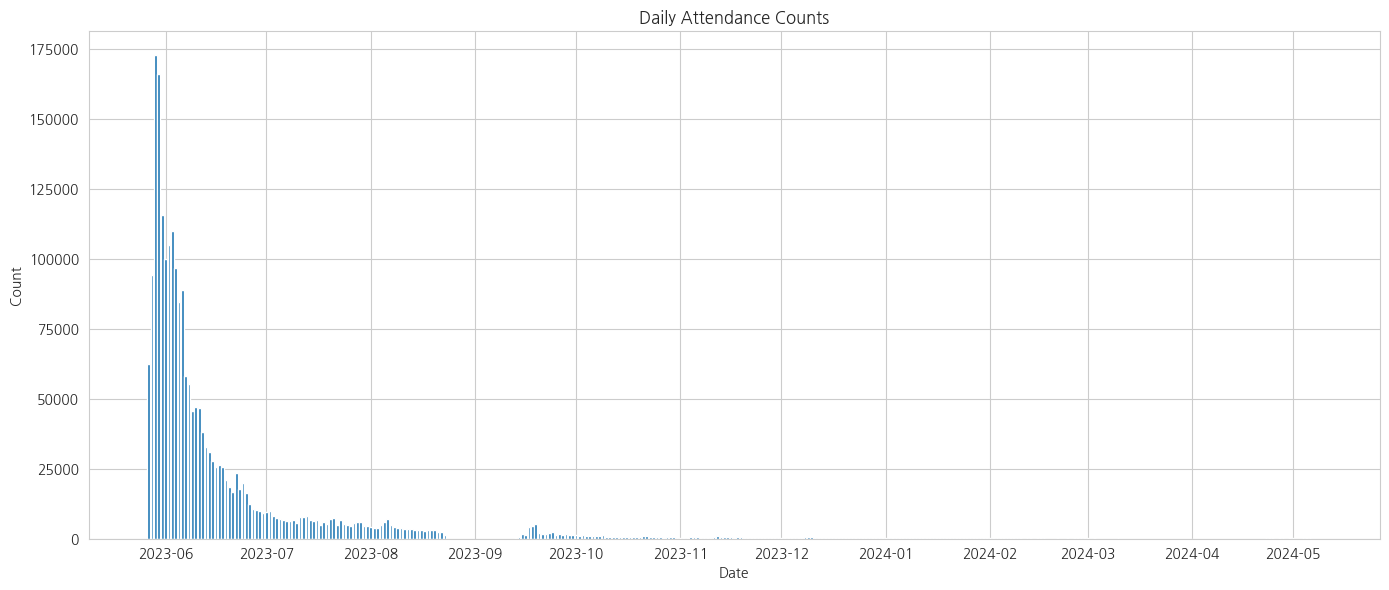

In [6]:
# 빈도수 측정
date_counts = Counter(all_dates)
# DataFrame으로 변환 및 정렬
df_counts = pd.DataFrame(date_counts.items(), columns=['date', 'count']).sort_values(by='date')
display(df_counts)

# 출석량 시각화
plt.figure(figsize=(14, 6))

plt.bar(df_counts['date'], df_counts['count'])

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())       # 월 단위 눈금
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Attendance Counts')
plt.tight_layout()
plt.show()

In [7]:
# 리스트를 flatten 하기 이전, 2차원 구조를 유지하며 datetime 객체로 변환
lists_dates = [[parse(dt).date() for dt in sublist] for sublist in lists] 

# term: 날짜 간격 리스트
terms = [
    [(x[i+1] - x[i]).days for i in range(len(x)-1)] if len(x) >= 2 else []
    for x in lists_dates
]
persist = [
    (max(x) - min(x)).days if len(x) > 0 else 0 for x in lists_dates
]
# len: 리스트 길이
lengths = [len(x) for x in lists_dates]

# 결과 DataFrame 생성
new_df = pd.DataFrame({
    'user_id': accounts_attendance_df['user_id'],
    'term': terms,    
    'persist(days)': persist,
    'len': lengths
})

new_df['avg_term'] = new_df['term'].apply(lambda x: sum(x) / len(x) if x else 0).round(2)
display(new_df)

,user_id,term,persist(days),len,avg_term
0,1446852,"[1, 1, 1, 4, 3, 6, 3, 25, 21, 43, 2, 5]",115,13,9.58
1,1359398,"[2, 1, 3, 1, 2, 2, 1, 2, 1, 4, 1, 1, 1, 1, 1, ...",87,33,2.72
2,1501542,"[2, 1, 1, 1, 1, 4, 1, 7]",18,9,2.25
3,1507767,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",34,30,1.17
4,1287453,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",32,31,1.07
...,...,...,...,...,...
349632,897005,[],0,0,0.00
349633,1407059,[],0,1,0.00
349634,1583727,[],0,1,0.00
349635,1392372,[],0,1,0.00


### Hackle 테이블 병합

In [8]:
device_properties_df = ds.hackle.device_properties()
hackle_events_df = ds.hackle.hackle_events()
hackle_properties_df = ds.hackle.hackle_properties()
user_properties_df = ds.hackle.user_properties()

In [9]:
# user_id 가 공백이거나 string인 경우 NAN으로 처리
hackle_properties_df['user_id'] = pd.to_numeric(hackle_properties_df['user_id'], errors='coerce')
# session_id와 user_id를 기준으로 정렬 (nan이 아닌 값이 위로 올라옴)
hackle_properties_df = hackle_properties_df.sort_values(['session_id','user_id'],ascending=True)
# session_id를 기준으로 중복 제거. (version_name을 살리기 어려움.)
hackle_properties_df = hackle_properties_df.drop_duplicates(subset=['session_id'], keep='first')

# user_id를 문자열 타입으로 재 변환 후, 공백인 경우 session id값 할당.
hackle_properties_df['user_id'] = hackle_properties_df['user_id'].where(
    hackle_properties_df['user_id'].notna(), 
    np.nan
).apply(lambda x: str(int(x)) if pd.notnull(x) else x)

hackle_properties_df['user_id'] = hackle_properties_df['user_id'].fillna(hackle_properties_df['session_id'])
hackle_properties_df = hackle_properties_df.drop_duplicates(subset=['session_id'], keep='first')
           

In [10]:
# 병합

merged_df = pd.merge(device_properties_df.drop(columns=['id']), hackle_properties_df.drop(columns=['id']), on='device_id', how='outer')
# 한 개의 device_id에 대해 2개의 device_model을 가진 경우가 존재 (1320건 = 660개) 그로 인해, merge할 때 일부 행에 중복 발생.

merged_df = pd.merge(merged_df, user_properties_df, on='user_id', how='left')
# user_id 가 공백이거나 string 형태가 되어 있는 경우는 Nan값 발생

merged_df = pd.merge(hackle_events_df.drop(columns=['id']), merged_df, on='session_id', how='left')

merged_df['event_id'] = merged_df['event_id'].astype('category').cat.codes.astype('int32')
merged_df['session_id'] = merged_df['session_id'].astype('category').cat.codes.astype('int32')

In [11]:
# 저장
# merged_df.to_parquet(
#     "gs://final-project-soomin/final_project/hackle/merged_hackle.parquet",
#     engine="pyarrow",
#     storage_options={"token": JSON_KEY_PATH},
# )

### Hackle 추가데이터 탐색

In [12]:
basepath = 'gs://final-project-soomin/final_project/additional_hackle'
storage_options = {'token':JSON_KEY_PATH}
columns = ["event_key", "session_id", "user_id","hackle_properties","event_properties"]
time_col =['Asia/Seoul','event_key','session_id']
hackle_list = [
    '2023-03-31.json',
    '2023-04-06.json',
    '2023-04-12.json',
    '2023-04-30.parquet',
    '2023-05-06.parquet',
    '2023-05-12.parquet',
    '2023-05-18.parquet',
    '2023-05-24.parquet',
    '2023-05-30.json',
    '2023-06-05.json',
    '2023-06-11.json',
    '2023-06-17.parquet',
    '2023-06-23.parquet',
    '2023-06-29.parquet',
    '2023-07-05.parquet'
]
# 2023-04-18.json 용량 문제로 제외
# 2023-04-24.json 용량 문제로 제외

In [13]:
# for file_list in hackle_list:
#     try:
#         hackle_df = pd.read_json(
#             path_or_buf = f'{basepath}/{file_list}',
#             storage_options = storage_options
#         )
#     except:
#         hackle_df = pd.read_parquet(
#         path = f'{basepath}/{file_list}',
#         engine = 'pyarrow',
#         storage_options= storage_options
#     )

#     dr.hackle_baseinfo(hackle_df)

# del basepath, storage_options, columns, time_col, hackle_list, file_list, hackle_df

### Hackle 평균 세션 시간 분석

In [14]:
def timedata_info(df):
    df = df.sort_values(by='start_time')
    df['duration'] = df['end_time'] - df['start_time']
    print(f'''total: {df.shape}
    end_error count: {df.end_time.isna().sum()}
    ratio: {df.end_time.isna().sum()/df.shape[0]:.4f}
    mean_duration: {df['duration'].mean()}
    '''
    )
    df['duration_min'] = df['duration'].dt.total_seconds() / 60
    time_limit = df['duration'].quantile(0.75).total_seconds() / 60 
    graph_df = df.loc[df['duration_min'] < time_limit].copy()     # 3/4분위수만 필터링

    plt.figure(figsize=(10, 5))
    sns.violinplot(x=graph_df['duration_min'])
    plt.xlabel('Duration (minutes)')
    plt.title('Session Duration Distribution (minutes)')
    plt.show()

In [15]:
df1 = pd.read_parquet(
    path = './timedata/05-06.parquet',
    engine = 'pyarrow'
)
df2 = pd.read_parquet(
    path = './timedata/05-12.parquet',
    engine = 'pyarrow'
)
df3 = pd.read_parquet(
    path = './timedata/05-18.parquet',
    engine = 'pyarrow'
)

total: (3582786, 5)
    end_error count: 274730
    ratio: 0.0767
    mean_duration: 0 days 03:04:41.636128101
    


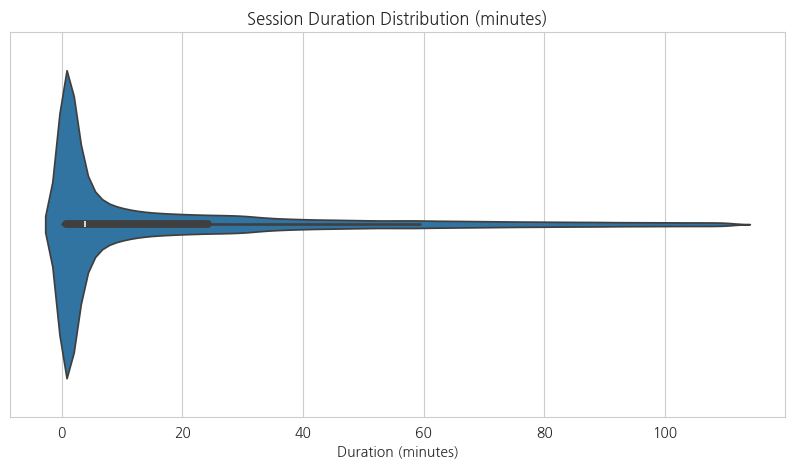

total: (6056080, 5)
    end_error count: 363157
    ratio: 0.0600
    mean_duration: 0 days 02:29:33.622607542
    


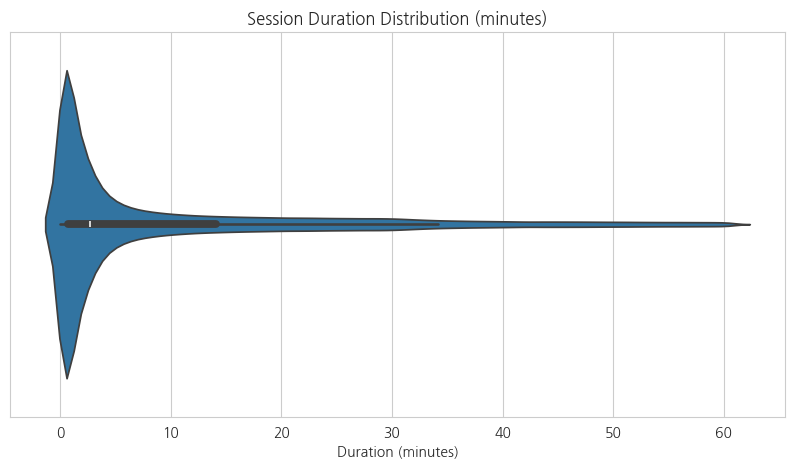

total: (4727950, 5)
    end_error count: 2189755
    ratio: 0.4632
    mean_duration: 0 days 01:43:26.127688081
    


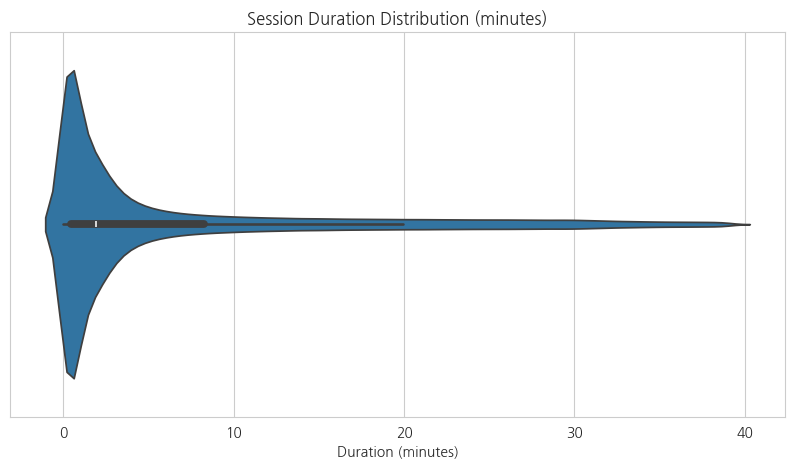

In [16]:
timedata_info(df1.copy())
timedata_info(df2.copy())
timedata_info(df3.copy())

## Votes 지표

In [71]:
# day 별 
def daycounter(df):
    day0 = pd.to_datetime('2023-05-01')
    day1 = pd.to_datetime('2023-05-01') + pd.Timedelta(days=1)
    result = {}
    while True:
        mask1 = df['created_at'] > day0
        mask2 = df['created_at'] < day1
        
        try:
            result[day0.strftime('%Y-%m-%d')] = df.loc[(mask1) & (mask2), 'user_id'].nunique()
        except:
            result[day0.strftime('%Y-%m-%d')] = df.loc[(mask1) & (mask2), 'id'].nunique()
        
        if day1 >= pd.to_datetime('2023-08-01'):
            break
        day0 = day0 + pd.Timedelta(days=1)
        day1 = day1 + pd.Timedelta(days=1)

    result_df = pd.DataFrame(list(result.items()), columns=['day', 'count'])
    return result_df

In [72]:
# day 별 누적
def dayculcounter(df):
    day = pd.to_datetime('2023-05-01')
    result = {}
    while True:
        mask2 = df['created_at'] <= day
        
        try:
            result[day.strftime('%Y-%m-%d')] = df.loc[(mask2), 'user_id'].nunique()
        except:
            result[day.strftime('%Y-%m-%d')] = df.loc[(mask2), 'id'].nunique()
        
        if day >= pd.to_datetime('2023-08-01'):
            break
        day = day + pd.Timedelta(days=1)

    result_df = pd.DataFrame(list(result.items()), columns=['day', 'count'])
    return result_df

In [67]:
def index_maker(cul_user_df, day_vote_user_df):
    cul_user_df['day'] = pd.to_datetime(cul_user_df['day'])
    day_vote_user_df['day'] = pd.to_datetime(day_vote_user_df['day'])

    merged_df = pd.merge(cul_user_df, day_vote_user_df, on ='day', suffixes=['_user','_vote'], how = 'left')
    merged_df = merged_df.iloc[:-1]
    merged_df['ratio'] = round(merged_df['count_vote'] / merged_df['count_user'] * 100,4)
    index_graph(merged_df)
    display(merged_df)

    return merged_df

# 지표 라인 그래프 그리기
def index_graph(merged_df):
    plt.figure(figsize=(10,6))
    ax = sns.lineplot(data=merged_df, x='day', y='ratio')

    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=0, interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    ax.set_title('Day별 투표율')
    ax.set_ylabel('투표율')
    ax.set_xlabel('Day')

    plt.tight_layout()
    plt.show()
    return

In [69]:
# 투표한 유저수 통합 테이블 구성
df = ds.votes.accounts_userquestionrecord()
reported_user_list = ds.votes.accounts_timelinereport()['reported_user_id'].unique()
vote_user_df = df.loc[df['status'] != 'B'].copy()
vote_user_df = vote_user_df.loc[vote_user_df['user_id'].isin(reported_user_list) == False]

In [73]:
temp = ds.votes.accounts_user()
temp = temp.loc[temp['created_at'] < '2023-08-01']
cul_with_draw_df = dayculcounter(ds.votes.accounts_userwithdraw())
cul_user_df = dayculcounter(ds.votes.accounts_user())
day_vote_user_df = daycounter(vote_user_df)

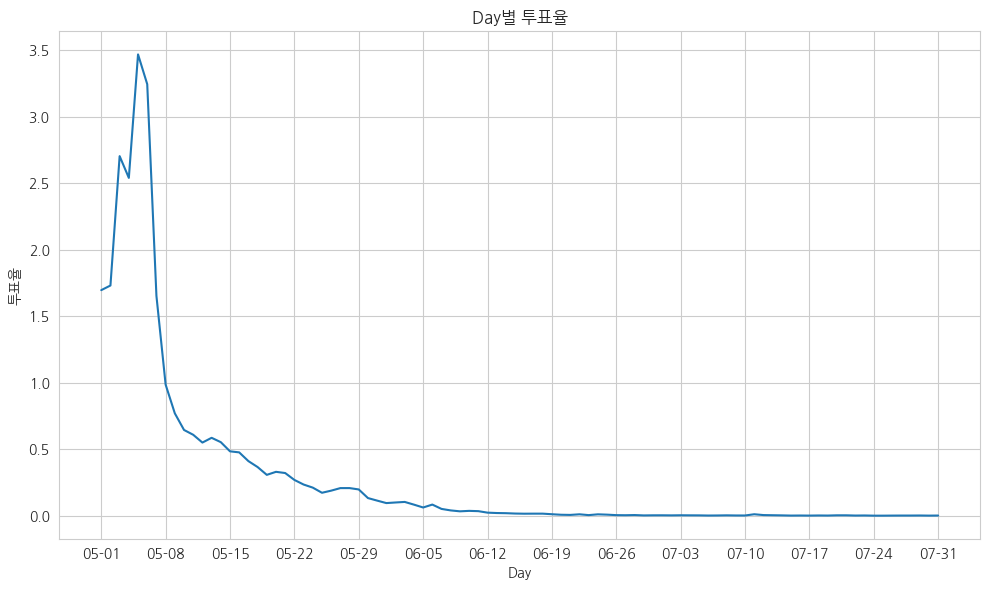

,day,count_user,count_vote,ratio
0,2023-05-01,19093,324.0,1.6970
1,2023-05-02,23733,411.0,1.7318
2,2023-05-03,27804,752.0,2.7046
3,2023-05-04,32035,814.0,2.5410
4,2023-05-05,35508,1232.0,3.4696
...,...,...,...,...
87,2023-07-27,673057,14.0,0.0021
88,2023-07-28,673090,14.0,0.0021
89,2023-07-29,673121,17.0,0.0025
90,2023-07-30,673146,11.0,0.0016


,day,count_user,count_vote,ratio
0,2023-05-01,19093,324.0,1.6970
1,2023-05-02,23733,411.0,1.7318
2,2023-05-03,27804,752.0,2.7046
3,2023-05-04,32035,814.0,2.5410
4,2023-05-05,35508,1232.0,3.4696
...,...,...,...,...
87,2023-07-27,673057,14.0,0.0021
88,2023-07-28,673090,14.0,0.0021
89,2023-07-29,673121,17.0,0.0025
90,2023-07-30,673146,11.0,0.0016


In [74]:
index_maker(cul_user_df, day_vote_user_df)

### 투표한 사람, 투표한 학교

In [81]:
group_df = ds.votes.accounts_group().rename(columns={'id':'group_id'})

qusetion_record = (
    ds.votes.accounts_userquestionrecord()[['id','status','created_at','user_id','chosen_user_id']]
    .query("created_at < '2023-08-01' and created_at >= '2023-05-01'")
    # .query("status != 'B'")
    # .query("user_id not in @reported_user_list")
)


user_df = (
    ds.votes.accounts_user()[['id','created_at','group_id']]
    .query("created_at < '2023-08-01'")
    # .query("id not in @reported_user_list")
    )

user_school = pd.merge(user_df, group_df[['group_id','school_id']], on='group_id', how='left').rename(columns={'id':'user_id'})

qusetion_record_school = pd.merge(
    user_school[['user_id','school_id']],
    qusetion_record,
    on='user_id',
    how='right'
)

school_list = qusetion_record_school.school_id.unique()
user_school = user_school.loc[user_school['school_id'].isin(school_list)]

In [24]:
quse_result = daycounter(qusetion_record_school)
user_result = dayculcounter(user_school)

# 함수 설계 이슈로, 5월 2일 데이터에 5월 1일까지의 누적 가입자수가 반영되는 문제가 있어서 수동으로 해결했다.
user_result['day'] = pd.to_datetime(user_result['day'])
user_result = user_result.iloc[1:]
user_result['day'] = user_result['day'] - pd.Timedelta(days=1)

quse_result['day'] = pd.to_datetime(quse_result['day'])

KPI = pd.merge(
    quse_result,
    user_result,
    on='day',
    how='left',
    suffixes=['_vote','_user']
)
KPI['ratio'] = round(KPI['count_vote'] / KPI['count_user'] * 100,4)
display(KPI)

del quse_result, user_result

,day,count_vote,count_user,ratio
0,2023-05-01,325,446,72.8700
1,2023-05-02,413,545,75.7798
2,2023-05-03,756,934,80.9422
3,2023-05-04,820,1118,73.3453
4,2023-05-05,1248,1552,80.4124
...,...,...,...,...
87,2023-07-27,14,5074,0.2759
88,2023-07-28,14,5074,0.2759
89,2023-07-29,17,5074,0.3350
90,2023-07-30,11,5074,0.2168


### 투표자 > accounts_user 에 전부 포함되는지 검증

In [26]:
question_id = ds.votes.polls_questionset().user_id.unique()
account_id = ds.votes.accounts_user()['id'].unique()
print(set(question_id).issubset(account_id))

del question_id, account_id

True


### 탈퇴율

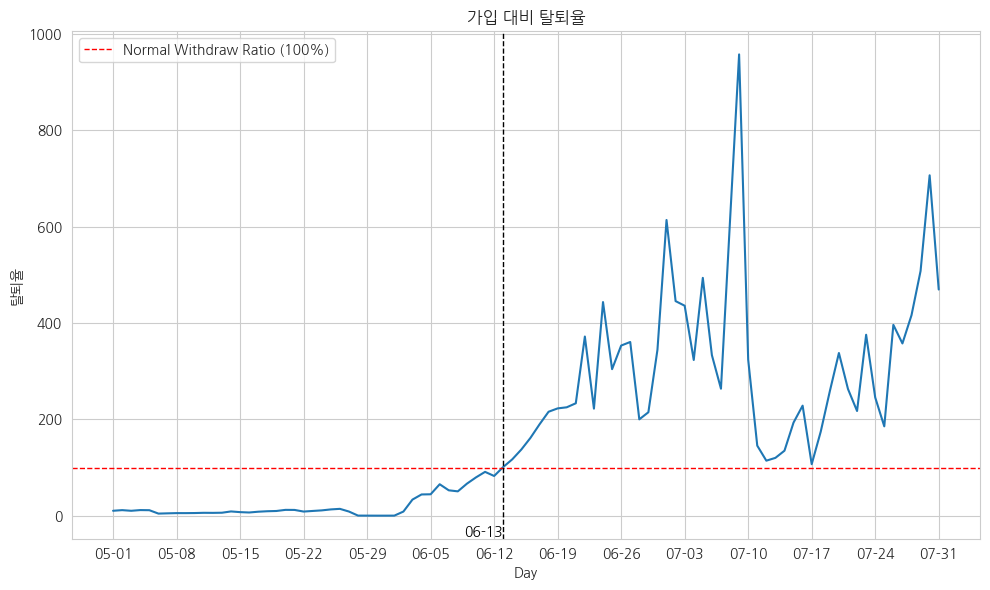

In [75]:
daily_signup = daycounter(ds.votes.accounts_user())
daily_withdraw = daycounter(ds.votes.accounts_userwithdraw())
daily_signup_N_withdraw = pd.merge(daily_signup,daily_withdraw,on='day', suffixes=['_signup','_withdraw'])
daily_signup_N_withdraw['ratio'] = round(daily_signup_N_withdraw['count_withdraw'] / daily_signup_N_withdraw['count_signup'] * 100, 4)

daily_signup_N_withdraw['day'] = pd.to_datetime(daily_signup_N_withdraw['day'])

graph_df = daily_signup_N_withdraw.copy()


plt.figure(figsize=(10,6))
ax = sns.lineplot(data=graph_df, x='day', y='ratio')

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=0, interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax.set_title('가입 대비 탈퇴율')
ax.set_ylabel('탈퇴율')
ax.set_xlabel('Day')

plt.axhline(y=100, color='red', linestyle='--', linewidth=1, label='Normal Withdraw Ratio (100%)')
plt.legend()

# ➤ 교차점 찾기: ratio >= 100인 첫 날
cross_point = graph_df[graph_df['ratio'] >= 100].sort_values('day').iloc[0]

cross_day = cross_point['day']
cross_ratio = cross_point['ratio']

plt.axvline(x=cross_day, color='black', linestyle='--', linewidth=1)
plt.text(cross_day, ax.get_ylim()[0], cross_day.strftime('%m-%d'),
         rotation=0, verticalalignment='bottom', horizontalalignment='right', color='black')


plt.tight_layout()
plt.show()

del daily_signup, daily_withdraw, graph_df, cross_point, cross_day, cross_ratio

### count_vote

In [76]:
# 투표한 유저수 통합 테이블 구성
df = ds.votes.accounts_userquestionrecord()
reported_user_list = ds.votes.accounts_timelinereport()['reported_user_id'].unique()
vote_user_df = df.loc[df['status'] != 'B'].copy()
vote_user_df = vote_user_df.loc[vote_user_df['user_id'].isin(reported_user_list) == False]

In [77]:
vote_count = daycounter(vote_user_df)
vote_count['day'] = pd.to_datetime(vote_count['day'])
daily_index = pd.merge(daily_signup_N_withdraw, vote_count.rename(columns={'count':'count_vote'}), on='day')

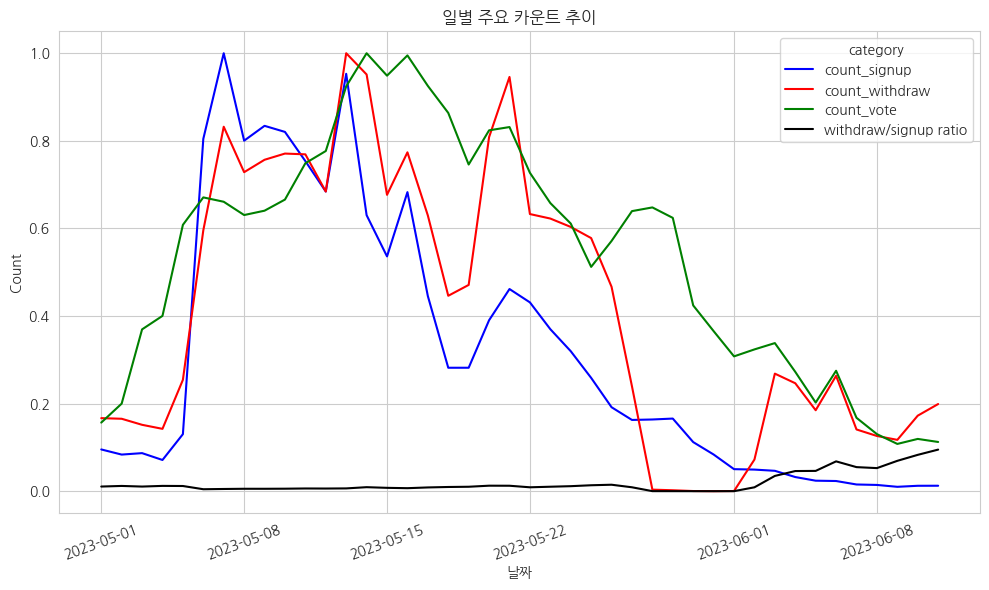

In [78]:
cols_to_normalize = ['count_signup', 'count_withdraw', 'count_vote','ratio']

# 각 컬럼 개별 정규화
daily_index_normalized = daily_index.loc[daily_index['day'] < '2023-06-12'].copy()
daily_index_normalized[cols_to_normalize] = daily_index[cols_to_normalize].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

daily_index_melted = daily_index_normalized.melt(id_vars='day', 
                    value_vars=cols_to_normalize,
                    var_name='category', 
                    value_name='count_normalized')

# 카테고리 이름 변경
daily_index_melted.loc[daily_index_melted['category'] =='ratio', 'category'] = 'withdraw/signup ratio'

# 그래프 그리기

plt.figure(figsize=(10,6))
sns.lineplot(data=daily_index_melted, x='day', y='count_normalized', hue='category', palette=['blue','red','green','black'])

plt.title('일별 주요 카운트 추이')
plt.xlabel('날짜')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

del cols_to_normalize, daily_index_normalized, daily_index_melted, daily_index, vote_count, df, reported_user_list, vote_user_df


### 근처에 있는 학교

In [94]:
avg_distance = ds.votes.accounts_nearbyschool().groupby('school_id')['distance'].mean().reset_index().rename(columns={'distance': 'average_distance'})  
# 10개만 기록되더라.

accounts_school_df = ds.votes.accounts_school()

school_info = (
    avg_distance
    .merge(accounts_school_df[['id', 'student_count', 'school_type']],
           left_on='school_id', right_on='id')
    .drop(columns='id')
    .merge(ds.votes.accounts_group(), on='school_id', how='left')
    .rename(columns={'id': 'group_id'})
)

,id,created_at,gender,group_id,school_id,average_distance,student_count,school_type,grade,class_num
0,831956,2023-03-29 03:44:14.047130,None,NaN,21.0,0.072075,0.0,M,NaN,NaN
1,831956,2023-03-29 03:44:14.047130,None,NaN,26.0,0.014281,0.0,H,NaN,NaN
2,831956,2023-03-29 03:44:14.047130,None,NaN,35.0,0.129255,0.0,H,NaN,NaN
3,831956,2023-03-29 03:44:14.047130,None,NaN,53.0,0.037474,0.0,H,NaN,NaN
4,831956,2023-03-29 03:44:14.047130,None,NaN,96.0,0.035183,0.0,H,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
673873,1579640,2023-07-31 16:40:15.522415,M,81557.0,3571.0,0.077066,78.0,H,3.0,3.0
673874,1579641,2023-07-31 16:48:48.598009,M,32088.0,4455.0,0.050666,279.0,H,1.0,3.0
673875,1579642,2023-07-31 16:52:27.877076,M,10260.0,1952.0,0.008380,130.0,H,1.0,6.0
673876,1579643,2023-07-31 17:48:00.152054,F,28720.0,4560.0,0.040768,85.0,M,2.0,1.0


In [95]:
accounts_user_df = ds.votes.accounts_user()[['id','created_at','gender','group_id']]
accounts_user_df = accounts_user_df.loc[accounts_user_df['created_at'] < '2023-08-01']
user_school_df = pd.merge(accounts_user_df, school_info, on='group_id', how='left')

user_school_df.dropna(inplace=True)

qusetion_record_df = (
    ds.votes.accounts_userquestionrecord()[['id', 'status', 'created_at', 'user_id']]
    .assign(
        created_at=lambda df: pd.to_datetime(df['created_at']),
    )
    .query("created_at < '2023-08-01' and status != 'B'")
    .assign(
        day=lambda df: df['created_at'].dt.floor('D')
    )
    .drop_duplicates(subset=['user_id', 'day'])
)
qusetion_record_df = pd.merge(qusetion_record_df.drop(columns='id'), user_school_df[['id','gender','school_id']], left_on='user_id', right_on='id').drop(columns='id')
grouped_question = qusetion_record_df.groupby(['day','school_id']).size().reset_index().rename(columns={0: 'vote_count_of_school'})  
user_school_df['day'] = pd.to_datetime(user_school_df['created_at']).dt.floor('D')

# 기간내 가입한 학교의 수.. 5537... 투표에 참가한 학교의 수 ... 10개..
print(user_school_df.loc[user_school_df['day'] < '2023-08-01'].school_id.nunique())
print(grouped_question.school_id.nunique())


del accounts_user_df, accounts_school_df, user_school_df, qusetion_record_df, school_info, grouped_question

5536
10


# Possible Features

## 열람건수 비율

In [32]:
# 기본 데이터
record = (
    ds.votes.accounts_userquestionrecord()
    .query('created_at < "2023-08-01"')
    .query('created_at >= "2023-04-28"')
)

master_table = pd.read_csv('./integrated_master_table.csv')

has_read_table = record[['chosen_user_id','has_read','id']].copy()

user_table = master_table[['user_id','retention_day8']].copy()

# 투표 받은 수 카운트
has_read_table['total_voted'] =  (
    has_read_table
    .groupby(['chosen_user_id'])['id']
    .transform('count')
)

# 읽은 수 카운트
has_read_table['total_read'] = (
    has_read_table
    .groupby(['chosen_user_id'])['has_read']
    .transform('sum')
)
# 컬럼 정리
has_read_table = has_read_table[['chosen_user_id','total_voted','total_read']].rename(columns={'chosen_user_id':'user_id'}).drop_duplicates(subset='user_id')

# 유저 마스터 테이블과 합치기
user_table = user_table.merge(
    has_read_table,
    on='user_id',
    how='left'
)

## 가입 후 n일 이내 포인트 사용 유무

In [33]:
# 기본 데이터
df = (ds.votes.accounts_userquestionrecord()
    .query("created_at < '2023-08-01' and created_at >= '2023-04-28'")
    .assign(day = lambda df: pd.to_datetime(df['created_at']).dt.floor('D'))
    )          

# 최초 날짜 로직
df_sorted = df.sort_values(by=['user_id','day'])
df_sorted_one = df_sorted.drop_duplicates(subset='user_id', keep='first')[['user_id','created_at']]

# 유저 리스트
user_list = df.user_id.unique()
user_df = pd.DataFrame(user_list, columns=['user_id'])

# 유저 테이블
user_created = (
    ds.votes.accounts_user()
    .query("id in @user_list")
)

# 포인트 사용 테이블
point_history_df = ds.votes.accounts_pointhistory().loc[ds.votes.accounts_pointhistory()['delta_point'] < 0]

point_history_df = (
    point_history_df
    .sort_values(by=['user_id','created_at'])
    .drop_duplicates(subset='user_id')
)

In [34]:
# 지표 dataframe 생성

# 회원가입한 날짜와 연결
working_merge = pd.merge(
    user_df,
    user_created[['id','created_at']],
    left_on='user_id',
    right_on='id'
).drop(columns='id')

working_merge = working_merge.rename(columns={'created_at':'sign_up_date'})

# 처음 투표한 날짜와 연결
working_merge = pd.merge(
    working_merge,
    df_sorted_one,
    on = 'user_id'
)
working_merge = working_merge.rename(columns={'created_at':'first_vote_date'})

# 처음 포인트 쓴 날과 양 연결
working_merge = pd.merge(
    working_merge,
    point_history_df[['user_id','created_at','delta_point']],
    on = 'user_id',
    how='left'
)
working_merge = working_merge.rename(columns={'created_at':'first_point_use_date', 'delta_point':'first_point_use_amount'})


# 중간 결과물
display(working_merge)

,user_id,sign_up_date,first_vote_date,first_point_use_date,first_point_use_amount
0,849436,2023-04-28 02:54:59.981972,2023-04-28 12:27:49,2023-04-28 17:44:51,-300.0
1,847375,2023-04-26 11:32:36.470049,2023-04-28 12:28:46,2023-04-29 09:09:36,-300.0
2,849438,2023-04-28 02:56:02.571340,2023-04-28 12:29:29,2023-04-30 13:37:52,-300.0
3,849479,2023-04-28 03:27:32.406440,2023-04-28 12:29:52,2023-04-28 14:31:21,-300.0
4,849441,2023-04-28 02:56:56.323854,2023-04-28 12:30:06,NaT,NaN
...,...,...,...,...,...
4840,1577440,2023-06-29 08:36:52.982230,2023-06-29 09:03:48,2023-06-30 05:36:03,-200.0
4841,1577436,2023-06-29 08:03:16.561688,2023-07-05 06:29:21,NaT,NaN
4842,857659,2023-04-30 07:48:39.390053,2023-07-11 09:11:26,2023-04-30 09:50:19,-300.0
4843,1578095,2023-07-11 13:25:58.942235,2023-07-11 13:29:13,NaT,NaN


In [35]:
# 날짜형으로 변환 (혹시 이미 datetime이면 생략 가능)
working_merge['sign_up_date'] = pd.to_datetime(working_merge['sign_up_date'])
working_merge['first_vote_date'] = pd.to_datetime(working_merge['first_vote_date'])
working_merge['first_point_use_date'] = pd.to_datetime(working_merge['first_point_use_date'])

# 가입한 당일 투표했는지 여부
working_merge['vote_sameday_signup'] = (
    (working_merge['first_vote_date'].dt.floor('D') == working_merge['sign_up_date'].dt.floor('D'))
    & working_merge['first_vote_date'].notnull()
).astype(int)

# 가입한지 3일 이내 포인트 사용했는지 여부
working_merge['point_used_within_signup_3days'] = (
    ((working_merge['first_point_use_date'] - working_merge['sign_up_date']).dt.days <= 3)
    & working_merge['first_point_use_date'].notnull()
).astype(int)

point_table = working_merge.copy()

del df, df_sorted, df_sorted_one, user_list, user_df, user_created, point_history_df

## 투표 등장 대비 선택받은 비율

In [36]:
# 후보군 데이터프레임 불러오기
user_candidate_df = (
    ds.votes.polls_usercandidate()
    .query("created_at < '2023-08-01'")
)

In [37]:
# 어라 왜? 한 질문에 여러개가 있지..?
user_candidate_df.groupby('question_piece_id').size().reset_index(name='count')['count'].unique()

array([ 4,  3,  2,  8,  1,  6, 16, 12])

In [38]:
temp = user_candidate_df.groupby('question_piece_id').size().reset_index(name='count')
verify_list = temp.loc[temp['count'] != 4].question_piece_id.unique()

question = ds.votes.polls_questionpiece()
record = ds.votes.accounts_userquestionrecord()

In [39]:
i = 0
exclude_qusetion = []

for question_piece_id in verify_list:
    temp = user_candidate_df.loc[user_candidate_df['question_piece_id'] == question_piece_id].copy()
    # 후보군이 넷 이상이면 상위 4개만 사용
    if temp.shape[0] > 4:
        temp['rank_in_group'] = temp.groupby('question_piece_id').cumcount()
        temp_top4 = temp[temp['rank_in_group'] < 4].copy()
        temp_top4.drop(columns='rank_in_group', inplace=True)
        
        # 상위 4개의 유저 리스트
        check_user = temp_top4['user_id'].unique()
    # 후보군이 넷 미만인 경우, 그대로 사용
    else:
        check_user = temp['user_id'].unique()

    chosen_user = record.loc[record['question_piece_id']== question_piece_id]['chosen_user_id']

    if chosen_user.isin(check_user).any() == True:
        i+=1
        if i % 1000 == 0:
            print('Running Successfully by 1000')
        continue
    else:
        print('Error')
        print(question_piece_id)
        exclude_qusetion.append(question_piece_id)
        continue

print('Loop End')

Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Error
3795300
Running Successfully by 1000
Error
4098458
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Error
17269961
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Running Successfully by 1000
Error
29763011
Running Succes

In [40]:
# 시각적 검증
for i in exclude_qusetion:
    check_num = i

    display(user_candidate_df.loc[user_candidate_df['question_piece_id'] == check_num])
    display(question.loc[question['id']== check_num])
    display(record.loc[record['question_piece_id']== check_num])
    print('='*50)
    print('='*50)


,id,created_at,question_piece_id,user_id
324590,11813124,2023-05-04 02:32:53,3795300,873573
324591,11813127,2023-05-04 02:32:53,3795300,877367


,id,is_voted,created_at,question_id,is_skipped
89339,3795300,1,2023-05-04 01:40:18,232,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
370451,12708253,2023-05-04 11:58:24,4098458,865079
370452,12708255,2023-05-04 11:58:24,4098458,869353
370453,12708256,2023-05-04 11:58:24,4098458,878751


,id,is_voted,created_at,question_id,is_skipped
102548,4098458,1,2023-05-04 11:58:15,329,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
2454796,219979072,2023-05-16 04:41:27,17269961,873680
2454797,219979074,2023-05-16 04:41:27,17269961,874872
2454798,219979075,2023-05-16 04:41:27,17269961,879918


,id,is_voted,created_at,question_id,is_skipped
302269,17269961,1,2023-05-09 10:18:23,548,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
2451597,219721616,2023-05-16 04:18:51,29763011,849490
2451598,219721617,2023-05-16 04:18:51,29763011,849543
2451599,219721618,2023-05-16 04:18:51,29763011,850728


,id,is_voted,created_at,question_id,is_skipped
364348,29763011,1,2023-05-11 09:01:32,203,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
2724272,254441953,2023-05-17 08:21:49,52789431,1023048
2724273,254441954,2023-05-17 08:21:49,52789431,1025949
2724274,254441955,2023-05-17 08:21:49,52789431,1037542


,id,is_voted,created_at,question_id,is_skipped
510485,52789431,1,2023-05-14 00:24:06,338,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
2503852,226061979,2023-05-16 08:59:48,52930048,1130903
2503853,226061980,2023-05-16 08:59:48,52930048,1167140
2503854,226061982,2023-05-16 08:59:48,52930048,1311277


,id,is_voted,created_at,question_id,is_skipped
511447,52930048,1,2023-05-14 00:46:44,115,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
3313598,339845167,2023-05-20 15:42:57,53475295,877667
3313599,339845168,2023-05-20 15:42:57,53475295,907463
3313600,339845169,2023-05-20 15:42:57,53475295,953051


,id,is_voted,created_at,question_id,is_skipped
515756,53475295,1,2023-05-14 02:01:57,643,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
2891207,277603879,2023-05-18 05:06:00,64314852,871079
2891208,277603880,2023-05-18 05:06:00,64314852,1143616
2891209,277603881,2023-05-18 05:06:00,64314852,1155868


,id,is_voted,created_at,question_id,is_skipped
602961,64314852,1,2023-05-15 06:41:45,264,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
3431996,358129099,2023-05-21 11:29:39,75060144,885305
3431997,358129100,2023-05-21 11:29:39,75060144,891498
3431998,358129101,2023-05-21 11:29:39,75060144,990101


,id,is_voted,created_at,question_id,is_skipped
680353,75060144,1,2023-05-16 11:10:34,616,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
4574267,587165323,2023-06-05 02:05:46,75544298,1126363
4574268,587165324,2023-06-05 02:05:46,75544298,1167245
4574269,587165326,2023-06-05 02:05:46,75544298,1194522


,id,is_voted,created_at,question_id,is_skipped
683239,75544298,1,2023-05-16 11:53:07,1559,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
3382774,350402902,2023-05-21 06:01:13,77297531,866364
3382775,350402903,2023-05-21 06:01:13,77297531,876170
3382776,350402904,2023-05-21 06:01:13,77297531,908877


,id,is_voted,created_at,question_id,is_skipped
693232,77297531,1,2023-05-16 14:06:46,862,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
2981671,290320959,2023-05-18 14:01:09,78976279,1178657
2981672,290320961,2023-05-18 14:01:09,78976279,1185828
2981673,290320962,2023-05-18 14:01:09,78976279,1208621


,id,is_voted,created_at,question_id,is_skipped
705293,78976279,1,2023-05-16 21:58:50,1041,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
4232398,504108569,2023-05-28 14:26:21,90744180,1039262
4232399,504108570,2023-05-28 14:26:21,90744180,1055196
4232400,504108571,2023-05-28 14:26:21,90744180,1055322


,id,is_voted,created_at,question_id,is_skipped
779065,90744180,1,2023-05-18 08:15:53,1508,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
4059597,468803603,2023-05-27 00:29:30,104925880,1211304
4059598,468803604,2023-05-27 00:29:30,104925880,1238815
4059599,468803605,2023-05-27 00:29:30,104925880,1344788


,id,is_voted,created_at,question_id,is_skipped
861320,104925880,1,2023-05-20 07:17:17,447,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
3545476,375406845,2023-05-22 08:10:21,111324988,1147719
3545477,375406847,2023-05-22 08:10:21,111324988,1284861
3545478,375406848,2023-05-22 08:10:21,111324988,1329106


,id,is_voted,created_at,question_id,is_skipped
894412,111324988,1,2023-05-21 03:19:41,782,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
4663607,612824851,2023-06-10 17:04:44,117415180,1141474
4663608,612824853,2023-06-10 17:04:44,117415180,1208374
4663609,612824854,2023-06-10 17:04:44,117415180,1272717


,id,is_voted,created_at,question_id,is_skipped
928264,117415180,1,2023-05-21 15:27:23,938,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
3687720,397608528,2023-05-23 09:26:14,127560840,1365270
3687721,397608530,2023-05-23 09:26:14,127560840,1370443
3687722,397608531,2023-05-23 09:26:14,127560840,1384004


,id,is_voted,created_at,question_id,is_skipped
981885,127560840,1,2023-05-23 09:24:53,265,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
4519935,572292763,2023-06-03 07:01:30,132660321,1224615
4519936,572292764,2023-06-03 07:01:30,132660321,1227682
4519937,572292765,2023-06-03 07:01:30,132660321,1274718


,id,is_voted,created_at,question_id,is_skipped
1006481,132660321,1,2023-05-24 04:27:21,573,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
4136853,483908387,2023-05-27 14:13:58,154484317,1012219
4136854,483908388,2023-05-27 14:13:58,154484317,1129885
4136855,483908389,2023-05-27 14:13:58,154484317,1185764
4136856,483908390,2023-05-27 14:13:58,154484317,1246556
4137717,484100483,2023-05-27 14:40:38,154484317,1126107
4137718,484100484,2023-05-27 14:40:38,154484317,1165022
4137719,484100485,2023-05-27 14:40:38,154484317,1185635
4137720,484100486,2023-05-27 14:40:38,154484317,1350693


,id,is_voted,created_at,question_id,is_skipped
1095162,154484317,1,2023-05-27 12:43:37,243,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
1057201,121023939,C,2023-05-27 14:40:39,1165022,243,1005921,154484317,1,N,2023-05-27 14:40:39,0,0


,id,created_at,question_piece_id,user_id
4305374,519657266,2023-05-29 11:39:34,161962348,883864
4305375,519657267,2023-05-29 11:39:34,161962348,886200
4305376,519657268,2023-05-29 11:39:34,161962348,886270


,id,is_voted,created_at,question_id,is_skipped
1124851,161962348,1,2023-05-28 15:00:53,1026,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
4720063,631078972,2023-06-25 10:01:34,162113503,1046408
4720064,631078973,2023-06-25 10:01:34,162113503,1054518
4720065,631078974,2023-06-25 10:01:34,162113503,1082513


,id,is_voted,created_at,question_id,is_skipped
1125511,162113503,1,2023-05-28 15:17:51,1643,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
4583183,589859943,2023-06-05 10:36:43,167079570,1047979
4583184,589859944,2023-06-05 10:36:43,167079570,1049506
4583185,589859945,2023-06-05 10:36:43,167079570,1131456


,id,is_voted,created_at,question_id,is_skipped
1143902,167079570,1,2023-05-29 12:43:21,863,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
4541285,577887075,2023-06-03 16:48:32,172864381,1479701
4541286,577887076,2023-06-03 16:48:32,172864381,1490216
4541287,577887077,2023-06-03 16:48:32,172864381,1495007


,id,is_voted,created_at,question_id,is_skipped
1164785,172864381,1,2023-05-30 15:20:35,476,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
4438186,550455640,2023-05-31 15:24:15,172872463,915833
4438187,550455641,2023-05-31 15:24:15,172872463,1121912
4438188,550455643,2023-05-31 15:24:15,172872463,1184867


,id,is_voted,created_at,question_id,is_skipped
1164826,172872463,1,2023-05-30 15:22:07,986,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
4472575,559643632,2023-06-01 16:57:19,175373896,1302677
4472576,559643633,2023-06-01 16:57:19,175373896,1412345
4472577,559643634,2023-06-01 16:57:19,175373896,1431000


,id,is_voted,created_at,question_id,is_skipped
1173042,175373896,1,2023-05-31 11:44:55,1623,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
4481628,562085947,2023-06-02 06:11:55,180040771,1406083
4481629,562085948,2023-06-02 06:11:55,180040771,1408407
4481630,562085949,2023-06-02 06:11:55,180040771,1419140


,id,is_voted,created_at,question_id,is_skipped
1187331,180040771,1,2023-06-02 03:32:03,829,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
4580927,588944415,2023-06-05 07:58:24,185998431,1142318
4580928,588944416,2023-06-05 07:58:24,185998431,1143273
4580929,588944418,2023-06-05 07:58:24,185998431,1194522


,id,is_voted,created_at,question_id,is_skipped
1205684,185998431,1,2023-06-04 03:42:59,2628,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
4606371,596585387,2023-06-06 10:24:18,186102837,1404314
4606372,596585388,2023-06-06 10:24:18,186102837,1404805
4606373,596585389,2023-06-06 10:24:18,186102837,1415183


,id,is_voted,created_at,question_id,is_skipped
1206006,186102837,1,2023-06-04 04:24:29,1671,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
4674285,616298191,2023-06-12 04:22:37,187029703,859341
4674286,616298192,2023-06-12 04:22:37,187029703,891669
4674287,616298193,2023-06-12 04:22:37,187029703,1074645


,id,is_voted,created_at,question_id,is_skipped
1208719,187029703,1,2023-06-04 11:06:34,2588,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
4686416,619990631,2023-06-14 06:57:49,187100793,1003689
4686417,619990632,2023-06-14 06:57:49,187100793,1106226
4686418,619990634,2023-06-14 06:57:49,187100793,1490709


,id,is_voted,created_at,question_id,is_skipped
1208898,187100793,1,2023-06-04 11:34:17,2990,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
4609657,597481532,2023-06-06 12:21:27,188411985,1067557
4609658,597481533,2023-06-06 12:21:27,188411985,1306075
4609659,597481534,2023-06-06 12:21:27,188411985,1435189


,id,is_voted,created_at,question_id,is_skipped
1212490,188411985,1,2023-06-05 02:57:01,2497,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


,id,created_at,question_piece_id,user_id
4669420,615006076,2023-06-11 12:42:42,190384856,1477046
4669421,615006077,2023-06-11 12:42:42,190384856,1492351
4669422,615006078,2023-06-11 12:42:42,190384856,1555833


,id,is_voted,created_at,question_id,is_skipped
1217653,190384856,1,2023-06-06 02:50:44,2297,0


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


In [41]:
# 유효한 질문 리스트
verify_list = verify_list[~np.isin(verify_list, exclude_qusetion)]

In [42]:
user_candidate_df.groupby('question_piece_id').cumcount()

piece_counts = user_candidate_df['question_piece_id'].value_counts()
over4_ids = piece_counts[piece_counts > 4].index

# 4개미만인 경우 그대로, 4개 초과인 경우 테이블 적재 기준 상위 4개만 남겨놓기
user_candidate_df['rank_in_group'] = user_candidate_df.groupby('question_piece_id').cumcount()

user_candidate_df_top4 = user_candidate_df[
    (~user_candidate_df['question_piece_id'].isin(over4_ids)) | 
    ((user_candidate_df['question_piece_id'].isin(over4_ids)) & (user_candidate_df['rank_in_group'] < 4))
].copy()

# 유효한 질문 리스트
user_candidate_df_top4 = user_candidate_df_top4.loc[user_candidate_df_top4['question_piece_id'].isin(verify_list)]

grouped_user_candidate_df = user_candidate_df_top4.groupby('user_id')['id'].size().reset_index(name='count')

record = (
    ds.votes.accounts_userquestionrecord()
    .query('created_at <= "2023-05-25"')
)
grouped_record = record.loc[record['question_piece_id'].isin(verify_list)].groupby('chosen_user_id').size().reset_index(name='chosen_count')

# 병합
working_merge = pd.merge(
    grouped_user_candidate_df,
    grouped_record,
    left_on='user_id',
    right_on='chosen_user_id',
    how='outer'
)
# 비율 계산
working_merge['ratio'] = working_merge['chosen_count'] / working_merge['count']

# NAN값 중 count만 0으로 저장
working_merge[['count','chosen_count']] = working_merge[['count','chosen_count']].fillna(0)

# 컬럼 이름을 명확하게 구분
working_merge = working_merge.rename(columns={'count':'candidate_count'})

# 중간 확인
display(working_merge)

del user_candidate_df, user_candidate_df_top4, grouped_user_candidate_df, grouped_record, record, piece_counts, over4_ids, working_merge

,user_id,candidate_count,chosen_user_id,chosen_count,ratio
0,833113,2,NaN,0.0,NaN
1,833154,1,NaN,0.0,NaN
2,833203,4,833203.0,2.0,0.5
3,833294,6,NaN,0.0,NaN
4,833424,1,NaN,0.0,NaN
...,...,...,...,...,...
11758,1569340,1,NaN,0.0,NaN
11759,1570001,1,NaN,0.0,NaN
11760,1571427,1,NaN,0.0,NaN
11761,1571616,1,NaN,0.0,NaN


# Master Table 셋팅

In [108]:
# SettingWithCopyWarning 무시
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [109]:
master_table = pd.read_csv('./dataset/master_last_v4.csv')
master_table = master_table.drop(columns=['Unnamed: 0'])


In [110]:
def table_merging(master_table, merge_table):
    result = master_table.merge(
    merge_table,
    on = 'user_id',
    how='left'
).copy()
    return result

## 가입 후 n일 이내 포인트 사용 유무

In [111]:
# 가입 후 7일 이내 결제 유무
date_user_table = point_table[['user_id','sign_up_date','first_vote_date','first_point_use_date','first_point_use_amount','vote_sameday_signup']]
date_user_table['sign_up_date'] = pd.to_datetime(date_user_table['sign_up_date'])
date_user_table['first_vote_date'] = pd.to_datetime(date_user_table['first_vote_date'])
date_user_table['first_point_use_date'] = pd.to_datetime(date_user_table['first_point_use_date'])

# 조건 컬럼
date_user_table['days_to_vote'] = (date_user_table['first_vote_date'] - date_user_table['sign_up_date']).dt.days
# 조건 컬럼
date_user_table['days_to_point'] = (date_user_table['first_point_use_date'] - date_user_table['sign_up_date']).dt.days
# 조건 컬럼
date_user_table['days_to_point_after_vote'] = (date_user_table['first_point_use_date'] - date_user_table['first_vote_date']).dt.days

final_master_table = table_merging(master_table, date_user_table)

NameError: name 'point_table' is not defined

## 처음 투표한 시간

In [ ]:
# 처음 투표한 시간
user_table = master_table[['user_id']].copy()
user_table = user_table.merge(point_table[['user_id','first_vote_date']], on='user_id',how='left')
user_table['first_vote_hour'] = pd.to_datetime(user_table['first_vote_date']).dt.hour

final_master_table = table_merging(final_master_table, user_table[['user_id','first_vote_hour']])

## 투표 첫 날 투표 건수

In [ ]:
qusetion_table = ds.votes.accounts_userquestionrecord()[['user_id','created_at','id']]
qusetion_table['day'] = pd.to_datetime(qusetion_table['created_at']).dt.floor("d")
qusetion_table = qusetion_table.drop(columns=['created_at'])

user_table['day'] = pd.to_datetime(user_table['first_vote_date']).dt.floor('d')

merged_table =pd.merge(
    user_table[['user_id','day']],
    qusetion_table,
    on = ['user_id','day'],
    how = 'left'
)

merged_table['first_voteday_question_count'] = (
    merged_table
    .groupby(['user_id', 'day'])['user_id']
    .transform('count')
)

merged_table = (
    merged_table
    .drop_duplicates(subset='user_id')
    .drop(columns=['id'])
)

final_master_table = table_merging(final_master_table, merged_table.drop(columns='day'))

del merged_table, qusetion_table, user_table, date_user_table

## 저장

In [ ]:
# final_master_table.to_csv('./master_table.csv', encoding='UTF-8', index=False)

# 마스터 테이블 분석

In [114]:
master_table = pd.read_csv('./dataset/master_last_v4.csv')
# master_table = final_master_table.copy()

## 기본함수

In [115]:
def cohort_cut(df):
    over50_cohort = df.loc[df['retention_day8'] >= 0.50]
    under50_cohort = df.loc[df['retention_day8'] < 0.50]
    return over50_cohort, under50_cohort

def cohort_cut_25(df):
    df['cohort_day'] = pd.to_datetime(df['first_vote']).dt.strftime("%m.%d")
    top_25_dates = ["04.30", "05.02", "05.09", "05.10", "05.12", "05.20", "05.21"]
    low_25_dates = ["05.04", "05.05", "05.06", "05.15", "05.16", "05.17", "05.24"]
    
    high_cohort = df.loc[df['cohort_day'].isin(top_25_dates)]
    low_cohort = df.loc[df['cohort_day'].isin(low_25_dates)]

    return high_cohort, low_cohort

In [116]:
def result_print(df, func, integrated = 0):
    if integrated != 0:
        high_cohort, low_cohort = cohort_cut_25(df)
        high_분석 = func(high_cohort)
        low_분석 = func(low_cohort)
        
        print('High-25%')
        display(high_분석)
        print('='*100)
        print('Low-25%')
        display(low_분석)
   
    else:
        over50_cohort, under50_cohort = cohort_cut(df)
        over50_분석 = func(over50_cohort)
        under50_분석 = func(under50_cohort)
        
        print('Over50')
        display(over50_분석)
        print('='*100)
        print('Under50')
        display(under50_분석)
    
    return

In [117]:
def candidate_analysis(df):
    result = df.agg({
    'first_point_use_amount': 'mean',
    'vote_sameday_signup': 'mean',
    'total_votes':'sum',
    'unique_days':'sum',
    'grade':'mean'
})
    result['vote_per_day'] = result['total_votes'] / result['unique_days']

    return result.reset_index()

In [118]:
def within_days_analysis(df):
    df = df.drop(columns=['user_id','retention_day8','sign_up_date','first_vote_date','first_point_use_date'])
    result = df.mean()
    return result.reset_index()

In [119]:
def first_voteday_anaylsis(df):
    df = df.drop(columns=['user_id','retention_day8','day'])
    result = df.mean()
    return result.reset_index()

In [120]:
def has_read_anaylsis(df):
    df = df.drop(columns=['user_id','retention_day8'])

    result = {
        'total_voted_mean' : df['total_voted'].mean().round(3),
        'total_voted_sum' : df['total_voted'].sum(),
        'total_read_mean' : df['total_read'].mean().round(3),
        'total_read_sum' : df['total_read'].sum(),
        'read_per_vote' : round((df['total_read'].sum() / df['total_voted'].sum()),3)
    }
    return result

## Vote Within

In [121]:
user_table = master_table[['user_id','total_votes','unique_days','retention_day8','gender','school_id','grade']]
user_table = user_table.merge(point_table, on='user_id',how='left')

date_user_table = user_table[['user_id','retention_day8','sign_up_date','first_vote_date','first_point_use_date']]
date_user_table['sign_up_date'] = pd.to_datetime(date_user_table['sign_up_date'])
date_user_table['first_vote_date'] = pd.to_datetime(date_user_table['first_vote_date'])
date_user_table['first_point_use_date'] = pd.to_datetime(date_user_table['first_point_use_date'])

# 조건 컬럼
date_user_table['days_to_vote'] = (date_user_table['first_vote_date'] - date_user_table['sign_up_date']).dt.days

# 조건별로 각 컬럼 생성
for i in range(1, 7):
    date_user_table[f'vote_within_{i}days'] = (date_user_table['days_to_vote'] <= i).astype(int)

# 7일 초과 투표
date_user_table['vote_over_7days'] = (date_user_table['days_to_vote'] > 7).astype(int)

result_print(date_user_table, within_days_analysis)

NameError: name 'point_table' is not defined

## Point Within

In [ ]:
## 포인트 기록

date_user_table = user_table[['user_id','retention_day8','sign_up_date','first_vote_date','first_point_use_date']]
date_user_table['sign_up_date'] = pd.to_datetime(date_user_table['sign_up_date'])
date_user_table['first_point_use_date'] = pd.to_datetime(date_user_table['first_point_use_date'])

# 조건 컬럼
date_user_table['days_to_point'] = (date_user_table['first_point_use_date'] - date_user_table['sign_up_date']).dt.days

# 조건별로 각 컬럼 생성
for i in range(1, 7):
    date_user_table[f'point_within_{i}days'] = (date_user_table['days_to_point'] <= i).astype(int)

# 7일 초과 투표
date_user_table['point_over_7days'] = (date_user_table['days_to_point'] > 7).astype(int)

result_print(date_user_table, within_days_analysis)

Over50


,index,0
0,days_to_point,1.345576
1,point_within_1days,0.793047
2,point_within_2days,0.845193
3,point_within_3days,0.873982
4,point_within_4days,0.895166
5,point_within_5days,0.908745
6,point_within_6days,0.927757
7,point_over_7days,0.038023


Under50


,index,0
0,days_to_point,1.057821
1,point_within_1days,0.800839
2,point_within_2days,0.855346
3,point_within_3days,0.879804
4,point_within_4days,0.895528
5,point_within_5days,0.905660
6,point_within_6days,0.913697
7,point_over_7days,0.027254


## Point Use After Vote

In [ ]:
## VOTE 대비 POINT TIME
date_user_table = user_table[['user_id','retention_day8','sign_up_date','first_vote_date','first_point_use_date']]
date_user_table['first_vote_date'] = pd.to_datetime(date_user_table['first_vote_date'])
date_user_table['first_point_use_date'] = pd.to_datetime(date_user_table['first_point_use_date'])

# 조건 컬럼
date_user_table['days_to_point_after_vote'] = (date_user_table['first_point_use_date'] - date_user_table['first_vote_date']).dt.days

# 조건별로 각 컬럼 생성
for i in range(1, 7):
    date_user_table[f'point_within_{i}vote_days'] = (date_user_table['days_to_point_after_vote'] <= i).astype(int)

# 7일 초과 투표
date_user_table['point_over_7vote_days'] = (date_user_table['days_to_point_after_vote'] > 7).astype(int)

result_print(date_user_table, within_days_analysis)

Over50


,index,0
0,days_to_point_after_vote,0.668336
1,point_within_1vote_days,0.877784
2,point_within_2vote_days,0.912004
3,point_within_3vote_days,0.933732
4,point_within_4vote_days,0.944052
5,point_within_5vote_days,0.952200
6,point_within_6vote_days,0.955459
7,point_over_7vote_days,0.016839


Under50


,index,0
0,days_to_point_after_vote,0.667532
1,point_within_1vote_days,0.850454
2,point_within_2vote_days,0.888889
3,point_within_3vote_days,0.901468
4,point_within_4vote_days,0.913347
5,point_within_5vote_days,0.918588
6,point_within_6vote_days,0.921733
7,point_over_7vote_days,0.019916


## 유저가 처음 투표한 시간

In [ ]:
user_table = master_table[['user_id','retention_day8']].copy()
user_table = user_table.merge(point_table[['user_id','first_vote_date']], on='user_id',how='left')
user_table['first_vote_hour'] = pd.to_datetime(user_table['first_vote_date']).dt.hour
display(user_table)

,user_id,retention_day8,first_vote_date,first_vote_hour
0,838023,0.515152,2023-04-29 16:22:56,16
1,838466,0.569444,2023-05-02 22:42:05,22
2,838642,0.560000,2023-04-28 14:18:07,14
3,839357,0.515152,2023-04-29 16:51:01,16
4,840293,0.422977,2023-05-03 02:24:05,2
...,...,...,...,...
4698,1510561,0.451613,2023-05-25 14:28:20,14
4699,1511957,0.451613,2023-05-25 15:46:25,15
4700,1512422,0.451613,2023-05-25 16:57:53,16
4701,1512542,0.451613,2023-05-25 22:59:47,22


## 첫 날 투표 건 수

In [ ]:
user_table = master_table[['user_id','retention_day8']].copy()
user_table = user_table.merge(point_table.drop(columns=['first_point_use_amount','point_used_within_signup_3days']), on='user_id',how='left')

qusetion_table = ds.votes.accounts_userquestionrecord()[['user_id','created_at','id']]
qusetion_table['day'] = pd.to_datetime(qusetion_table['created_at']).dt.floor("d")
qusetion_table = qusetion_table.drop(columns=['created_at'])

user_table['day'] = pd.to_datetime(user_table['first_vote_date']).dt.floor('d')

merged_table =pd.merge(
    user_table[['user_id','retention_day8','day']],
    qusetion_table,
    on = ['user_id','day'],
    how = 'left'
)

merged_table['question_count'] = (
    merged_table
    .groupby(['user_id', 'day'])['user_id']
    .transform('count')
)

merged_table = (
    merged_table
    .drop_duplicates(subset='user_id')
    .drop(columns=['id'])
)

result_print(merged_table, first_voteday_anaylsis)


Over50


,index,0
0,question_count,27.364476


Under50


,index,0
0,question_count,30.314116


## 가입한 첫 날 투표 건수

In [ ]:
user_table = master_table[['user_id','retention_day8']].copy()
user_table = user_table.merge(point_table.drop(columns=['first_point_use_amount','point_used_within_signup_3days']), on='user_id',how='left')
# user_table = user_table.loc[user_table['vote_sameday_signup'] == 1]

qusetion_table = ds.votes.accounts_userquestionrecord()[['user_id','created_at','id']]
qusetion_table['day'] = pd.to_datetime(qusetion_table['created_at']).dt.floor("d")
qusetion_table = qusetion_table.drop(columns=['created_at'])

user_table['day'] = pd.to_datetime(user_table['sign_up_date']).dt.floor('d')


merged_table =pd.merge(
    user_table[['user_id','retention_day8','day']],
    qusetion_table,
    on = ['user_id','day'],
    how = 'left'
)

merged_table['question_count'] = (
    merged_table
    .groupby(['user_id', 'day'])['user_id']
    .transform('count')
)

merged_table = (
    merged_table
    .drop_duplicates(subset='user_id')
    .drop(columns=['id'])
)
display(merged_table)

result_print(merged_table, first_voteday_anaylsis)

,user_id,retention_day8,day,question_count
0,838023,0.515152,2023-04-19,1
1,838466,0.569444,2023-04-19,1
2,838642,0.560000,2023-04-20,1
3,839357,0.515152,2023-04-20,1
4,840293,0.422977,2023-04-21,1
...,...,...,...,...
111811,1510561,0.451613,2023-05-25,9
111820,1511957,0.451613,2023-05-25,8
111828,1512422,0.451613,2023-05-25,22
111850,1512542,0.451613,2023-05-25,7


Over50


,index,0
0,question_count,21.30201


Under50


,index,0
0,question_count,25.383298


## 투표 심화

### Unique Days가 높은 유저와 낮은 유저간 피쳐 비교

In [ ]:
master_table = pd.read_csv('./dataset/master_last_v4.csv')
master_table = master_table.drop(columns=['Unnamed: 0'])

In [ ]:
qusetion_table = ds.votes.accounts_userquestionrecord()[['user_id','created_at','id']]
qusetion_table['day'] = pd.to_datetime(qusetion_table['created_at']).dt.floor("d")
qusetion_table = qusetion_table.drop(columns=['created_at'])

master_table['day'] = pd.to_datetime(master_table['first_vote']).dt.floor('d')

merged_table =pd.merge(
    master_table[['user_id','day']],
    qusetion_table,
    on = ['user_id','day'],
    how = 'left'
)

merged_table['first_voteday_question_count'] = (
    merged_table
    .groupby(['user_id', 'day'])['user_id']
    .transform('count')
)

merged_table = (
    merged_table
    .drop_duplicates(subset='user_id')
    .drop(columns=['id'])
)

master_table_v2 = table_merging(master_table, merged_table.drop(columns='day'))

In [ ]:
# unique_days 기준 상위 25%와 하위 25% 구분
q75 = master_table_v2['unique_days'].quantile(0.75)
q25 = master_table_v2['unique_days'].quantile(0.25)

# 상위 25% (unique_days >= q75)
top_25 = master_table_v2[master_table_v2['unique_days'] >= q75]

# 하위 25% (unique_days <= q25)
bottom_25 = master_table_v2[master_table_v2['unique_days'] <= q25]

In [ ]:
col = ['user_id','unique_days','chosen_count','period_friend_count','votes_within_3d','first_voteday_question_count']

In [ ]:
a_top_25 = top_25[col].copy()
a_bottom_25 = bottom_25[col].copy()
a_top_25['chosen_per_day'] = a_top_25['chosen_count'] / a_top_25['unique_days']
a_bottom_25['chosen_per_day'] = a_bottom_25['chosen_count'] / a_bottom_25['unique_days']

print('top25')
for i in a_top_25.columns:
    try:
        print(i)
        print(a_top_25[i].mean())
    except:
        continue

print('\n\nbottom25')
for i in a_bottom_25.columns:
    try:
        print(i)
        print(a_bottom_25[i].mean())
    except:
        continue

top25
user_id
1082749.9717595945
unique_days
18.418537291817522
chosen_count
264.3461259956553
period_friend_count
52.02534395365677
votes_within_3d
135.183924692252
first_voteday_question_count
31.785662563359885
chosen_per_day
15.24363550849185


bottom25
user_id
1099127.6569555718
unique_days
4.152949745083758
chosen_count
165.55938416422288
period_friend_count
37.065549890750184
votes_within_3d
67.360524399126
first_voteday_question_count
25.219956300072834
chosen_per_day
45.515273704789834


### 3일 동안 100번 이상의 투표 경험과 Unique Days와의 상관관계

In [ ]:
master_table_v2['3days_vote_over100'] = (master_table_v2['votes_within_3d'] >= 100).astype(int)
correlation = master_table_v2[['unique_days', '3days_vote_over100']].corr()
print(correlation)

                    unique_days  3days_vote_over100
unique_days            1.000000            0.279517
3days_vote_over100     0.279517            1.000000


### First Vote Count와 Unique Days와의 Threshold 그룹 평균 비교

Top 5 threshold candidates:
   threshold  mean_diff  size_group0  size_group1  mean_group0  mean_group1
0          9   1.591325         1064         3639     9.250940    10.842264
1         10   1.497272         1218         3485     9.372742    10.870014
9         18   1.452945         1991         2712     9.644400    11.097345
2         11   1.449122         1413         3290     9.468507    10.917629
8         17   1.440333         1889         2814     9.620434    11.060768


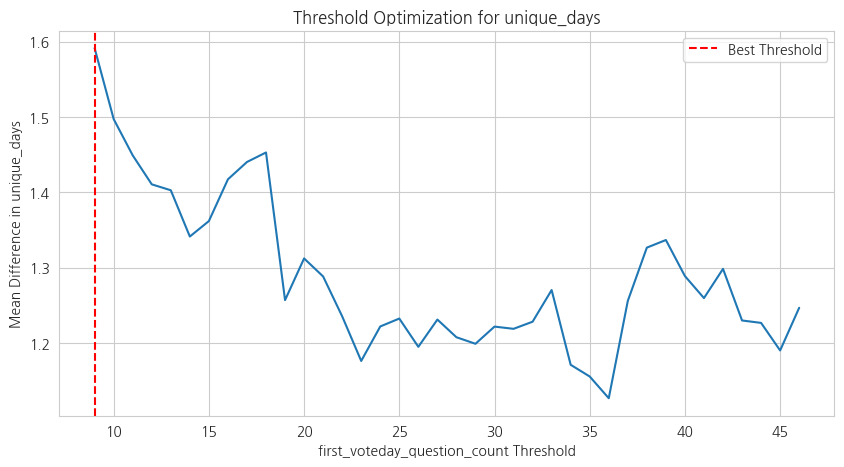

In [ ]:
최소 = master_table_v2['first_voteday_question_count'].min()
최대 = master_table_v2['first_voteday_question_count'].max()
thresholds = np.arange(최소, 최대+1, 1)  # 임계값 후보들: 최소부터 최대까지 1단위 간격
min_group_size = 1000  # 너무 작은 그룹 제외
results = []

for thresh in thresholds:
    group0 = master_table_v2[master_table_v2['first_voteday_question_count'] < thresh]
    group1 = master_table_v2[master_table_v2['first_voteday_question_count'] >= thresh]
    
    size0 = group0.shape[0]
    size1 = group1.shape[0]
    
    if size0 >= min_group_size and size1 >= min_group_size:
        mean0 = group0['unique_days'].mean()
        mean1 = group1['unique_days'].mean()
        diff = abs(mean1 - mean0)

        results.append({
            'threshold': thresh,
            'mean_diff': diff,
            'size_group0': size0,
            'size_group1': size1,
            'mean_group0': mean0,
            'mean_group1': mean1
        })

# 결과를 데이터프레임으로 보기 좋게 출력
results_df = pd.DataFrame(results)
sorted_results = results_df.sort_values(by='mean_diff', ascending=False)

print("Top 5 threshold candidates:")
print(sorted_results.head(5))



plt.figure(figsize=(10,5))
plt.plot(results_df['threshold'], results_df['mean_diff'])
plt.axvline(sorted_results.iloc[0]['threshold'], color='r', linestyle='--', label='Best Threshold')
plt.xlabel('first_voteday_question_count Threshold')
plt.ylabel('Mean Difference in unique_days')
plt.title('Threshold Optimization for unique_days')
plt.legend()
plt.grid(True)
plt.show()

### 3일 이내 투표와 Unique Days와의 Threshold 그룹 평균 비교

가장 큰 평균 차이를 만드는 최적 threshold: 2 (차이: 6.62)


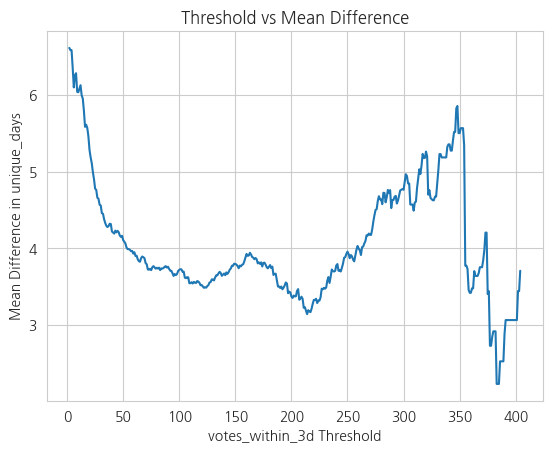

In [ ]:
최소 = master_table_v2['votes_within_3d'].min()
최대 = master_table_v2['votes_within_3d'].max()
thresholds = np.arange(최소, 최대+1, 1)  # 임계값 후보들: 최소부터 최대까지 1단위 간격
best_threshold = None
best_diff = 0
results = []

for thresh in thresholds:
    group0 = master_table_v2[master_table_v2['votes_within_3d'] < thresh]['unique_days']
    group1 = master_table_v2[master_table_v2['votes_within_3d'] >= thresh]['unique_days']
    
    if len(group0) > 10 and len(group1) > 10:  # 최소 샘플 수 확보
        mean_diff = abs(group0.mean() - group1.mean())
        results.append((thresh, mean_diff))
        
        if mean_diff > best_diff:
            best_diff = mean_diff
            best_threshold = thresh

print(f"가장 큰 평균 차이를 만드는 최적 threshold: {best_threshold} (차이: {best_diff:.2f})")


thresholds, diffs = zip(*results)
plt.plot(thresholds, diffs)
plt.xlabel('votes_within_3d Threshold')
plt.ylabel('Mean Difference in unique_days')
plt.title('Threshold vs Mean Difference')
plt.grid(True)
plt.show()

### 3일 이내 투표, 최소 그룹 사이즈 조건 설정

Top 5 threshold candidates:
   threshold  mean_diff  size_group0  size_group1  mean_group0  mean_group1
3         43   4.231471         1102         3601     7.242287    11.473757
5         45   4.229476         1153         3550     7.289679    11.519155
0         40   4.220287         1022         3681     7.179061    11.399348
6         46   4.211780         1169         3534     7.317365    11.529145
4         44   4.209436         1126         3577     7.280639    11.490075


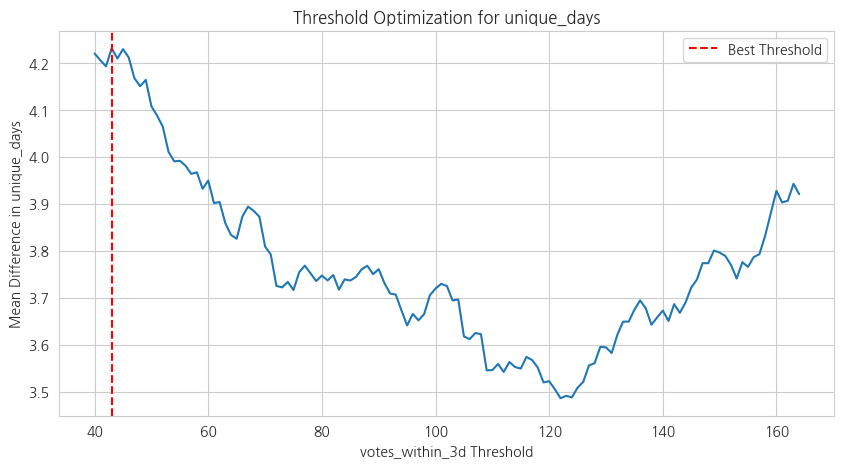

In [ ]:
최소 = master_table_v2['votes_within_3d'].min()
최대 = master_table_v2['votes_within_3d'].max()
thresholds = np.arange(최소, 최대+1, 1)  # 임계값 후보들: 최소부터 최대까지 1단위 간격
min_group_size = 1000  # 너무 작은 그룹 제외
results = []

for thresh in thresholds:
    group0 = master_table_v2[master_table_v2['votes_within_3d'] < thresh]
    group1 = master_table_v2[master_table_v2['votes_within_3d'] >= thresh]
    
    size0 = group0.shape[0]
    size1 = group1.shape[0]
    
    if size0 >= min_group_size and size1 >= min_group_size:
        mean0 = group0['unique_days'].mean()
        mean1 = group1['unique_days'].mean()
        diff = abs(mean1 - mean0)

        results.append({
            'threshold': thresh,
            'mean_diff': diff,
            'size_group0': size0,
            'size_group1': size1,
            'mean_group0': mean0,
            'mean_group1': mean1
        })

# 결과를 데이터프레임으로 보기 좋게 출력
results_df = pd.DataFrame(results)
sorted_results = results_df.sort_values(by='mean_diff', ascending=False)

print("Top 5 threshold candidates:")
print(sorted_results.head(5))



plt.figure(figsize=(10,5))
plt.plot(results_df['threshold'], results_df['mean_diff'])
plt.axvline(sorted_results.iloc[0]['threshold'], color='r', linestyle='--', label='Best Threshold')
plt.xlabel('votes_within_3d Threshold')
plt.ylabel('Mean Difference in unique_days')
plt.title('Threshold Optimization for unique_days')
plt.legend()
plt.grid(True)
plt.show()

### 3일 이내 투표, 기울기 확인

기울기가 가장 큰 지점의 threshold: 108


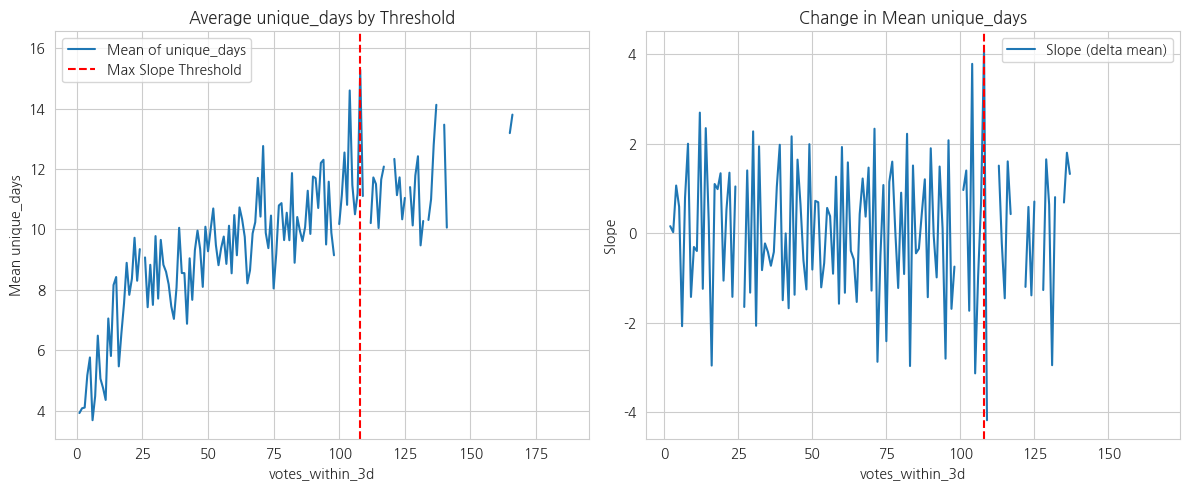

In [ ]:
최소 = master_table_v2['votes_within_3d'].min()
최대 = master_table_v2['votes_within_3d'].max()
thresholds = np.arange(최소, 최대+1, 1)  # 임계값 후보들: 최소부터 최대까지 1단위 간격
means = []

for thresh in thresholds:
    subset = master_table_v2[master_table_v2['votes_within_3d'] == thresh]
    if subset.shape[0] >= 15:  # 최소 샘플 수 확보
        means.append(subset['unique_days'].mean())
    else:
        means.append(np.nan)

means_series = pd.Series(means)
slopes = means_series.diff()  # 인접한 평균 간의 차이

max_slope_idx = slopes.idxmax()
best_threshold = thresholds[max_slope_idx]

print(f"기울기가 가장 큰 지점의 threshold: {best_threshold}")

plt.figure(figsize=(12, 5))

# 평균 그래프
plt.subplot(1, 2, 1)
plt.plot(thresholds, means, label='Mean of unique_days')
plt.axvline(best_threshold, color='red', linestyle='--', label='Max Slope Threshold')
plt.xlabel('votes_within_3d')
plt.ylabel('Mean unique_days')
plt.title('Average unique_days by Threshold')
plt.legend()

# 기울기 그래프
plt.subplot(1, 2, 2)
plt.plot(thresholds, slopes, label='Slope (delta mean)')
plt.axvline(best_threshold, color='red', linestyle='--')
plt.xlabel('votes_within_3d')
plt.ylabel('Slope')
plt.title('Change in Mean unique_days')
plt.legend()

plt.tight_layout()
plt.show()


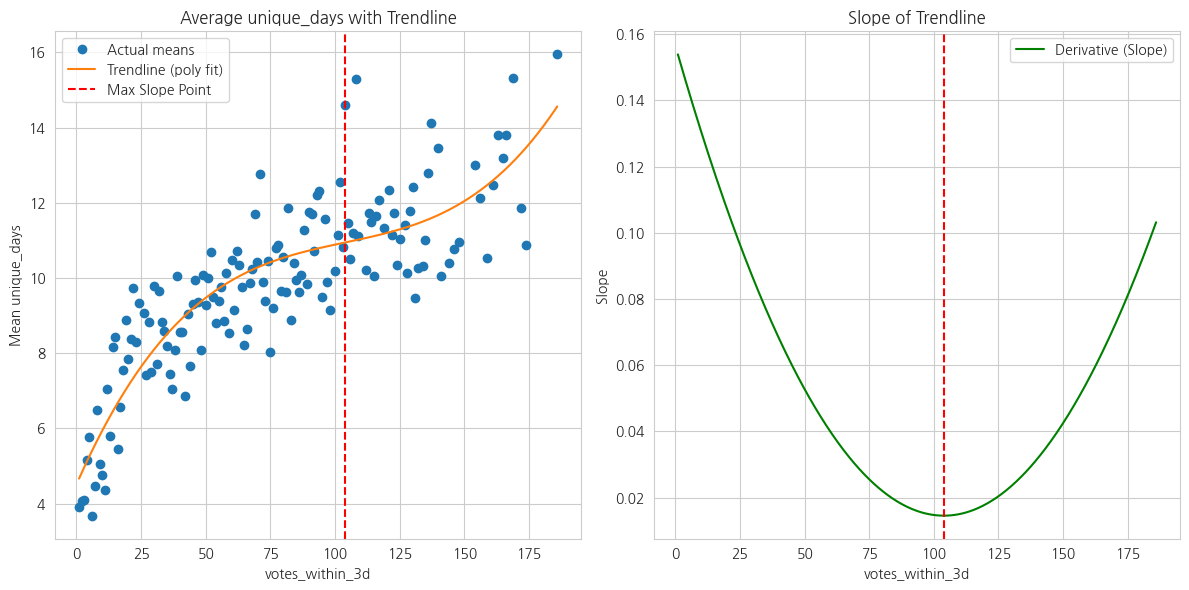

기울기 최대값 기준 최적 threshold: 104.07


In [ ]:
# 유효한 값만 필터링 (nan 제외)
valid_mask = ~np.isnan(means)
x = np.array(thresholds)[valid_mask]
y = np.array(means)[valid_mask]

# 다항 회귀 (2차 또는 3차)
coeffs = np.polyfit(x, y, deg=3)  # degree 조정 가능
poly_func = np.poly1d(coeffs)

# 추세선
x_fit = np.linspace(min(x), max(x), 500)
y_fit = poly_func(x_fit)

# 기울기 함수 (미분)
slope_func = poly_func.deriv()
y_slope = slope_func(x_fit)

# 기울기 최대값 기준 threshold
max_slope_idx = np.argmax(y_slope)
min_slope_idx = np.argmin(y_slope)
best_threshold_by_slope = x_fit[min_slope_idx]


plt.figure(figsize=(12, 6))

# 평균 그래프 + 추세선
plt.subplot(1, 2, 1)
plt.plot(x, y, 'o', label='Actual means')
plt.plot(x_fit, y_fit, '-', label='Trendline (poly fit)')
plt.axvline(best_threshold_by_slope, color='red', linestyle='--', label='Max Slope Point')
plt.xlabel('votes_within_3d')
plt.ylabel('Mean unique_days')
plt.title('Average unique_days with Trendline')
plt.legend()

# 기울기 그래프
plt.subplot(1, 2, 2)
plt.plot(x_fit, y_slope, label='Derivative (Slope)', color='green')
plt.axvline(best_threshold_by_slope, color='red', linestyle='--')
plt.xlabel('votes_within_3d')
plt.ylabel('Slope')
plt.title('Slope of Trendline')
plt.legend()

plt.tight_layout()
plt.show()

print(f"기울기 최대값 기준 최적 threshold: {best_threshold_by_slope:.2f}")

### 친구 수와 Unique Days와의 관계성

In [ ]:
최소 = master_table_v2['period_friend_count'].min()
최대 = master_table_v2['period_friend_count'].max()
thresholds = np.arange(최소, 최대+1, 1)  # 임계값 후보들: 최소부터 최대까지 1단위 간격
means = []

for thresh in thresholds:
    subset = master_table_v2[master_table_v2['period_friend_count'] == thresh]
    if subset.shape[0] >= 15:  # 최소 샘플 수 확보
        means.append(subset['unique_days'].mean())
    else:
        means.append(np.nan)

means_series = pd.Series(means)
slopes = means_series.diff()  # 인접한 평균 간의 차이

max_slope_idx = slopes.idxmax()
best_threshold = thresholds[max_slope_idx]

print(f"기울기가 가장 큰 지점의 threshold: {best_threshold}")

기울기가 가장 큰 지점의 threshold: 90.0


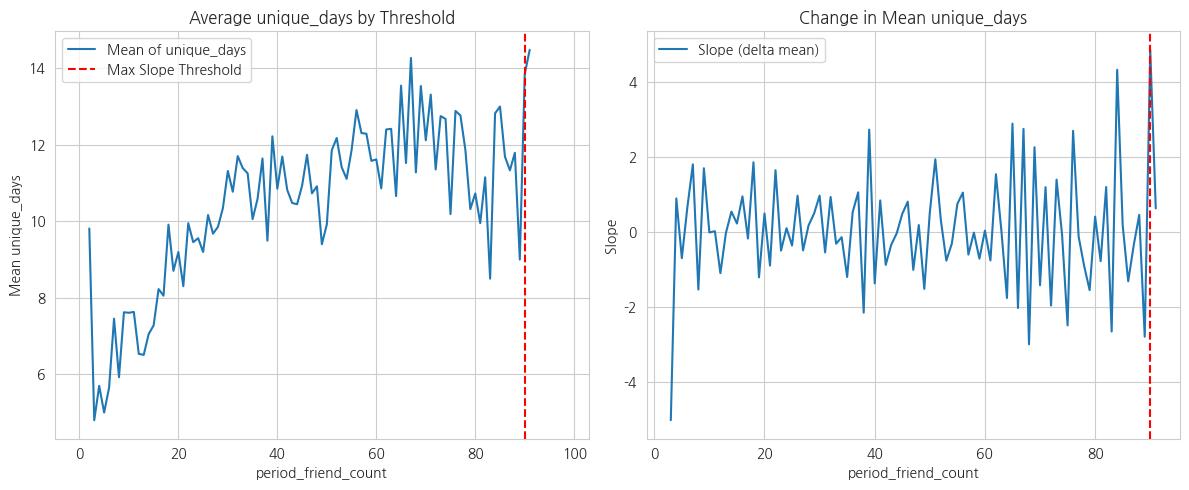

In [ ]:
plt.figure(figsize=(12, 5))

# 평균 그래프
plt.subplot(1, 2, 1)
plt.plot(thresholds, means, label='Mean of unique_days')
plt.axvline(best_threshold, color='red', linestyle='--', label='Max Slope Threshold')
plt.xlabel('period_friend_count')
plt.ylabel('Mean unique_days')
plt.title('Average unique_days by Threshold')
plt.legend()

# 기울기 그래프
plt.subplot(1, 2, 2)
plt.plot(thresholds, slopes, label='Slope (delta mean)')
plt.axvline(best_threshold, color='red', linestyle='--')
plt.xlabel('period_friend_count')
plt.ylabel('Slope')
plt.title('Change in Mean unique_days')
plt.legend()

plt.tight_layout()
plt.show()


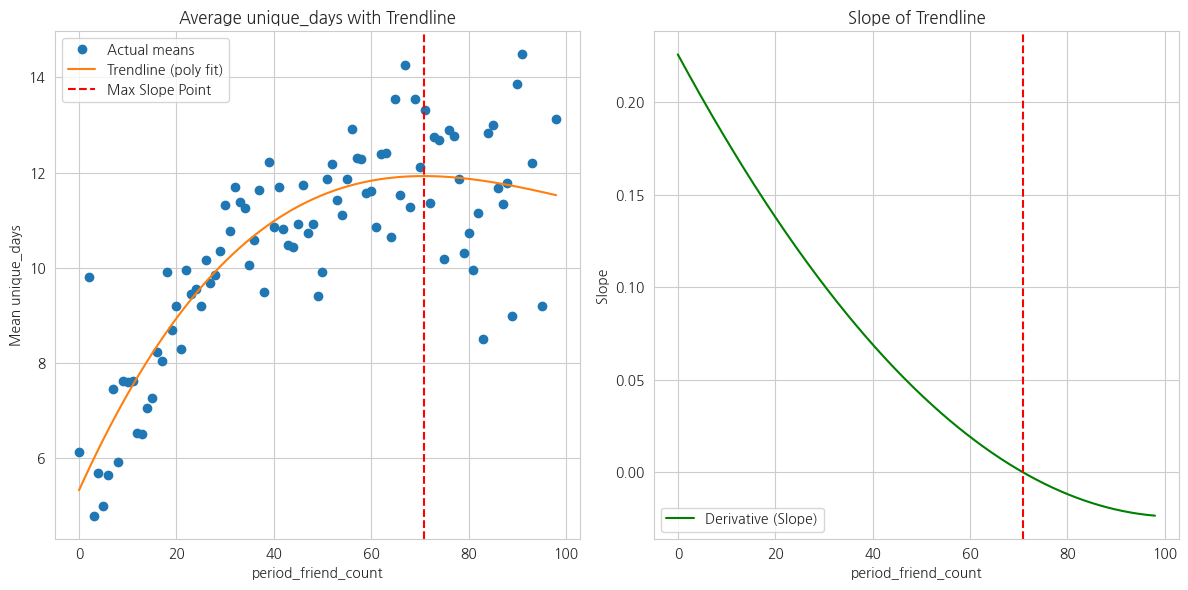

기울기 기준 최적 threshold: 70.80


In [ ]:
# 유효한 값만 필터링 (nan 제외)
valid_mask = ~np.isnan(means)
x = np.array(thresholds)[valid_mask]
y = np.array(means)[valid_mask]

# 다항 회귀 (2차 또는 3차)
coeffs = np.polyfit(x, y, deg=3)  # degree 조정 가능
poly_func = np.poly1d(coeffs)

# 추세선
x_fit = np.linspace(min(x), max(x), 500)
y_fit = poly_func(x_fit)

# 기울기 함수 (미분)
slope_func = poly_func.deriv()
y_slope = slope_func(x_fit)

# 기울기 최대값 기준 threshold
max_slope_idx = np.argmax(y_slope)
min_slope_idx = np.argmin(y_slope)

# slope가 0에 가까운 첫 번째 지점 찾기
zero_slope_idx = np.where(np.isclose(y_slope, 0, atol=1e-3))[0]
if zero_slope_idx.size > 0:
    best_threshold_by_slope = np.mean(x_fit[zero_slope_idx])


plt.figure(figsize=(12, 6))

# 평균 그래프 + 추세선
plt.subplot(1, 2, 1)
plt.plot(x, y, 'o', label='Actual means')
plt.plot(x_fit, y_fit, '-', label='Trendline (poly fit)')
plt.axvline(best_threshold_by_slope, color='red', linestyle='--', label='Max Slope Point')
plt.xlabel('period_friend_count')
plt.ylabel('Mean unique_days')
plt.title('Average unique_days with Trendline')
plt.legend()

# 기울기 그래프
plt.subplot(1, 2, 2)
plt.plot(x_fit, y_slope, label='Derivative (Slope)', color='green')
plt.axvline(best_threshold_by_slope, color='red', linestyle='--')
plt.xlabel('period_friend_count')
plt.ylabel('Slope')
plt.title('Slope of Trendline')
plt.legend()

plt.tight_layout()
plt.show()

print(f"기울기 기준 최적 threshold: {best_threshold_by_slope:.2f}")



## 첫 날 열람 건수

In [ ]:
record = ds.votes.accounts_userquestionrecord()
has_read_table = record[['chosen_user_id','has_read','id']].copy()

user_table = master_table[['user_id','retention_day8']].copy()

has_read_table['total_voted'] =  (
    has_read_table
    .groupby(['chosen_user_id'])['id']
    .transform('count')
)
has_read_table['total_read'] = (
    has_read_table
    .groupby(['chosen_user_id'])['has_read']
    .transform('sum')
)
has_read_table = has_read_table[['chosen_user_id','total_voted','total_read']].rename(columns={'chosen_user_id':'user_id'}).drop_duplicates(subset='user_id')

user_table = user_table.merge(
    has_read_table,
    on='user_id',
    how='left'
)
result_print(user_table, has_read_anaylsis)

Over50


{'total_voted_mean': 269.928,
 'total_voted_sum': 340919.0,
 'total_read_mean': 158.584,
 'total_read_sum': 200292.0,
 'read_per_vote': 0.588}

Under50


{'total_voted_mean': 163.451,
 'total_voted_sum': 203169.0,
 'total_read_mean': 90.822,
 'total_read_sum': 112892.0,
 'read_per_vote': 0.556}

# 코호트 비교

## 기본 함수

In [100]:
def per_day_cal(numerator, denominator):
    result = np.where(
    denominator == 0,
    numerator / 1,
    numerator / denominator
    )
    return np.round(result,2)

In [101]:
def table_v6_analysis(df):
    result = df.agg({
    'total_votes': 'mean',
    'unique_days': 'mean',
    'active_days': 'mean',
    'total_votes_per_uniqueday': 'mean',
    'gender': 'mean',
    'grade':'mean',
    'votes_within_3d':'mean',
    'period_friend_count':'mean',
    'first_point_use_amount':'mean',
    'vote_sameday_signup':'mean',
    'days_to_vote':'mean',
    'days_to_point':'mean',
    'days_to_point_after_vote':'mean',
    'first_voteday_question_count':'mean',
    'chosen_count':'mean',
    'chosen_count_per_uniqueday' :'mean',
    'student_count':'mean',
    'school_type':'mean'
    })
    
    return result.reset_index()

In [102]:
def integrated_anaylsis(df):
    result = df.agg({
    'total_votes': 'mean',
    'unique_days': 'mean',
    'active_days': 'mean',
    'total_votes_per_uniqueday': 'mean',
    'total_votes_per_acitiveday': 'mean',
    'gender': 'mean',
    'unique_days':'mean',
    'grade':'mean',
    'votes_within_3d_count':'mean',
    'reported_user_count':'mean',
    'vote_nunique_user_count':'mean',
    'period_friend_count':'mean',
    'first_point_use_amount':'mean',
    'vote_sameday_signup':'mean',
    'days_to_vote':'mean',
    'days_to_point':'mean',
    'days_to_point_after_vote':'mean',
    'first_voteday_question_count':'mean',
    'total_voted':'mean',
    'total_read':'mean',
    'total_voted_per_uniqueday': 'mean',
    'total_voted_per_acitiveday': 'mean',
    'total_read_per_uniqueday': 'mean',
    'total_read_per_acitiveday': 'mean',
    'opposite_sex_votes_received_count':'mean',
    'opposite_sex_vote_received_ratio':'mean',
    'candidate_count':'mean',
    'chosen_count':'mean',
    'ratio':'mean',
    'student_count':'mean',
    'school_type':'mean'
})
    return result.reset_index()

In [103]:
drop_col = [
    'user_id','sign_up_date','first_vote_date','first_point_use_date',
    'address','first_question_text','first_question_category',
    'last_vote'
    ]

## 분석

In [123]:
master_table = pd.read_csv('./dataset/master_table_v6.csv')

In [124]:
user_table = master_table.drop(columns=drop_col).copy()

gender_dic = {'M':0, 'F':1}
school_dic = {'M':1, 'H':2}
user_table['gender'] = user_table['gender'].map(gender_dic)
user_table['school_type'] = user_table['school_type'].map(school_dic)

user_table['total_votes_per_uniqueday'] = per_day_cal(user_table['total_votes'], user_table['unique_days'])
user_table['total_votes_per_acitiveday'] = per_day_cal(user_table['total_votes'], user_table['active_days']) 
user_table['chosen_count_per_uniqueday'] = per_day_cal(user_table['chosen_count'], user_table['unique_days'])


In [125]:
result_print(user_table, table_v6_analysis, 1)

High-25%


,index,0
0,total_votes,306.138840
1,unique_days,12.282953
2,active_days,22.787346
3,total_votes_per_uniqueday,23.566125
4,gender,0.559754
5,grade,1.903339
6,votes_within_3d,107.265378
7,period_friend_count,48.234622
8,first_point_use_amount,-257.942498
9,vote_sameday_signup,0.739895


Low-25%


,index,0
0,total_votes,206.826367
1,unique_days,8.737138
2,active_days,17.074759
3,total_votes_per_uniqueday,23.117074
4,gender,0.513666
5,grade,1.921222
6,votes_within_3d,106.104502
7,period_friend_count,41.774116
8,first_point_use_amount,-285.705628
9,vote_sameday_signup,0.846463


In [126]:
## 스케일링
from sklearn.preprocessing import MinMaxScaler
exclude_col = ['first_vote','cohort_day','retention_group','retention_day8']

scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(user_table.drop(columns=exclude_col))
scaled_df = pd.DataFrame(scaled_array, columns=user_table.drop(columns=exclude_col).columns)

scaled_df[['first_vote','cohort_day']] = user_table[['first_vote','cohort_day']]

result_print(scaled_df, table_v6_analysis, 1)

High-25%


,index,0
0,total_votes,0.109881
1,unique_days,0.146532
2,active_days,0.242419
3,total_votes_per_uniqueday,0.181560
4,gender,0.559754
5,grade,0.451670
6,votes_within_3d,0.224663
7,period_friend_count,0.243609
8,first_point_use_amount,0.145026
9,vote_sameday_signup,0.739895


Low-25%


,index,0
0,total_votes,0.074118
1,unique_days,0.100482
2,active_days,0.181646
3,total_votes_per_uniqueday,0.177947
4,gender,0.513666
5,grade,0.460611
6,votes_within_3d,0.222208
7,period_friend_count,0.210980
8,first_point_use_amount,0.049291
9,vote_sameday_signup,0.846463


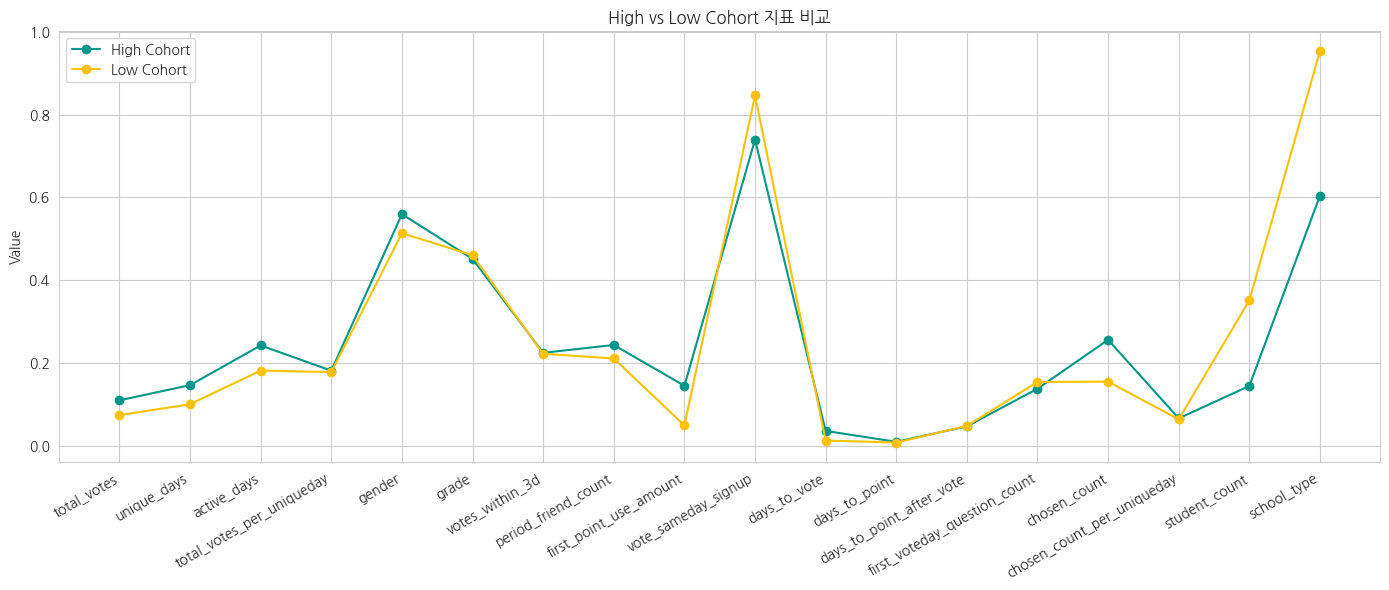

In [128]:
# high_분석, low_분석은 생성
high_cohort, low_cohort = cohort_cut_25(scaled_df)
high_분석 = table_v6_analysis(high_cohort)
low_분석 = table_v6_analysis(low_cohort)

# 그래프 그리기
plt.figure(figsize=(14, 6))
plt.plot(high_분석['index'], high_분석[0], marker='o', label='High Cohort', color = '#009688')
plt.plot(low_분석['index'], low_분석[0], marker='o', label='Low Cohort', color = '#ffc107')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Value')
plt.title('High vs Low Cohort 지표 비교')
plt.legend()
plt.tight_layout()
plt.show()

# T-test

## 테스트 함수

In [28]:
def cohen_d(x, y):
    nx, ny = len(x), len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx - 1) * np.var(x, ddof=1) + (ny - 1) * np.var(y, ddof=1)) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

In [29]:
def cal_samplesize(x,y):
    power_analysis = TTestIndPower()
    alpha = 0.05
    power = 0.8

    sample_size = power_analysis.solve_power(effect_size=cohen_d(x, y), alpha=alpha, power=power, alternative='two-sided')
    
    # print(f'''
    # alpha : {alpha}
    # power : {power}
    # 필요한 샘플 크기 (그룹당): {sample_size:.0f}
    # ''')
    
    # int로 변환, 올림처리로 예외 반영
    return int(np.ceil(sample_size)) 

In [30]:
def Normality_test(x,y):
    p1 = shapiro(x).pvalue
    p2 = shapiro(y).pvalue

    return ((p1 > 0.05) and (p2 > 0.05))

In [31]:
def Equal_var_test(x,y,normal):
    # 정규성을 만족하지 않으면, 등분산 검정을 진행하지 않음.
    
    if normal == True:
        p_var = levene(x,y).pvalue
        return (p_var > 0.05)
    
    return False
    

In [32]:
def T_Test(x,y,normal, equal_var):
    # 정규성, 등분산의 결과에 따라 수행하는 T-test 방법을 달리하고 방법을 기록
    
    if normal == True:
        t_stat, p_val = ttest_ind(x, y, equal_var=equal_var)
        test_used = 'T-test (equal_var)' if equal_var else "Welch T-Test"
    else:
        t_stat, p_val = mannwhitneyu(x,y, alternative='two-sided')
        test_used = 'Mann-Whitney U'
    
    return t_stat, p_val, test_used

In [33]:
def result_saving(result, col, sample_size, normal, equal_var, test_used, t_stat, p_val):
    result.append({
        'column':col,
        'sample_size':sample_size,
        'normality':normal,
        'equal_var':equal_var,
        'test':test_used,
        'statistic':t_stat,
        'p_value':p_val,
        'significant':p_val < 0.05
    })
    return result

In [34]:
def Statistic_test(result, x, y, random_state=42):
    # 컬럼명 기록
    col = x.name
    
    # 계산된 sample_size가 len보다 길 경우를 상정하고 예외
    sample_size = min(cal_samplesize(x,y), len(x), len(y)) 

    # 계산한 sample_size에 맞게, 각각의 x, y에서 샘플 추출
    x_sample = x.sample(n=sample_size, random_state=random_state)
    y_sample = y.sample(n=sample_size, random_state=random_state)

    # 정규성, 등분산성 검정 후 해당 결과를 바탕으로 T-test 진행
    normal = Normality_test(x_sample,y_sample)
    equal_var = Equal_var_test(x_sample,y_sample,normal)
    t_stat, p_val, test_used = T_Test(x_sample,y_sample,normal,equal_var)
    
    # 결과 저장
    result = result_saving(result, col, sample_size, normal, equal_var, test_used, t_stat, p_val)

    return result

## T-test 수행

In [35]:
master_table = pd.read_csv('./dataset/master_table_v6.csv')

drop_col = [
    'Unnamed: 0','user_id','sign_up_date','first_vote_date','first_point_use_date',
    'address','first_question_text','first_question_category',
    'last_vote','retention_group'
    ]

user_table = master_table.drop(columns=drop_col).copy()

user_table['total_votes_per_uniqueday'] = per_day_cal(user_table['total_votes'], user_table['unique_days'])
user_table['chosen_count_per_uniqueday'] = per_day_cal(user_table['chosen_count'], user_table['unique_days'])

gender_dic = {'M':0, 'F':1}
school_dic = {'M':1, 'H':2}
user_table['gender'] = user_table['gender'].map(gender_dic)
user_table['school_type'] = user_table['school_type'].map(school_dic)

user_table['days_to_point'].fillna(99, inplace=True)
user_table['days_to_point_after_vote'].fillna(99, inplace=True)
user_table.fillna(0, inplace=True)

high_cohort, low_cohort = cohort_cut_25(user_table)
high_cohort = high_cohort.drop(columns=['first_vote','cohort_day','retention_day8'])
low_cohort = low_cohort.drop(columns=['first_vote','cohort_day','retention_day8'])

In [36]:
# T검정 수행
result = []

for col in high_cohort:
    result = Statistic_test(result, high_cohort[col], low_cohort[col])

result_df = pd.DataFrame(result)
display(result_df)    

,column,sample_size,normality,equal_var,test,statistic,p_value,significant
0,total_votes,80,False,False,Mann-Whitney U,3652.5,1.229423e-01,False
1,unique_days,53,False,False,Mann-Whitney U,1678.0,8.363099e-02,False
2,active_days,138,False,False,Mann-Whitney U,11785.0,6.404553e-04,True
3,gender,1138,False,False,Mann-Whitney U,681093.0,1.319330e-02,True
4,school_id,18,False,False,Mann-Whitney U,240.5,1.277352e-02,True
5,grade,1138,False,False,Mann-Whitney U,642147.0,7.142509e-01,False
6,group_id,83,False,False,Mann-Whitney U,4843.0,6.325483e-06,True
7,votes_within_3d,1138,False,False,Mann-Whitney U,654600.0,6.516330e-01,False
8,period_friend_count,274,False,False,Mann-Whitney U,44182.5,3.366732e-04,True
9,student_count,32,False,False,Mann-Whitney U,345.5,2.437586e-02,True


In [38]:
# T-test 검정 방식에 대한 카운팅 추가

sig_counts = {col: 0 for col in result_df['column']}
test_counts = {col : {'T-test (equal_var)': 0, 'Welch T-Test':0, 'Mann-Whitney U':0} for col in result_df['column']}

for random_state in range(1, 43):
    temp_result = []
    for col in high_cohort.columns:
        temp_result = Statistic_test(temp_result, high_cohort[col], low_cohort[col], random_state)
    temp_df = pd.DataFrame(temp_result)
    
    for idx, row in temp_df.iterrows():
        col_name = row['column']
        if row['significant']:
            sig_counts[row['column']] += 1
        test_counts[col_name][row['test']] += 1

rows = []
for col in sig_counts:
    row = {
        'column' : col,
        'significant_count' : sig_counts[col],
        'T-Tset' : test_counts[col].get('T-Test',0),
        'Welch T-Test' : test_counts[col].get('Welch T-Test',0),
        'Mann-Whitney U' : test_counts[col].get('Mann-Whitney U',0)
    }
    rows.append(row)

sig_counts_df = pd.DataFrame(rows)
sig_counts_df = sig_counts_df.sort_values(by='significant_count', ascending=False).reset_index(drop=True)
sig_counts_df

,column,significant_count,T-Tset,Welch T-Test,Mann-Whitney U
0,chosen_count_per_uniqueday,42,0,0,42
1,active_days,42,0,0,42
2,first_voteday_question_count,42,0,0,42
3,first_point_use_amount,42,0,0,42
4,student_count,39,0,0,42
5,group_id,39,0,0,42
6,gender,37,0,0,42
7,vote_sameday_signup,37,0,0,42
8,unique_days,37,0,0,41
9,firstquestion_id,36,0,0,42


# 랜덤 포레스트 분석

## 랜포 Feature Importance 아이디어

0.6901323040036054
Feature Importances: [0.04348186 0.0039251  0.18031524 0.02254874 0.07772433 0.02305865
 0.07161404 0.17002434 0.056658   0.05374138 0.01660581 0.00951049
 0.01503717 0.01361067 0.01981779 0.10045882 0.02270479 0.03353891
 0.06562387]


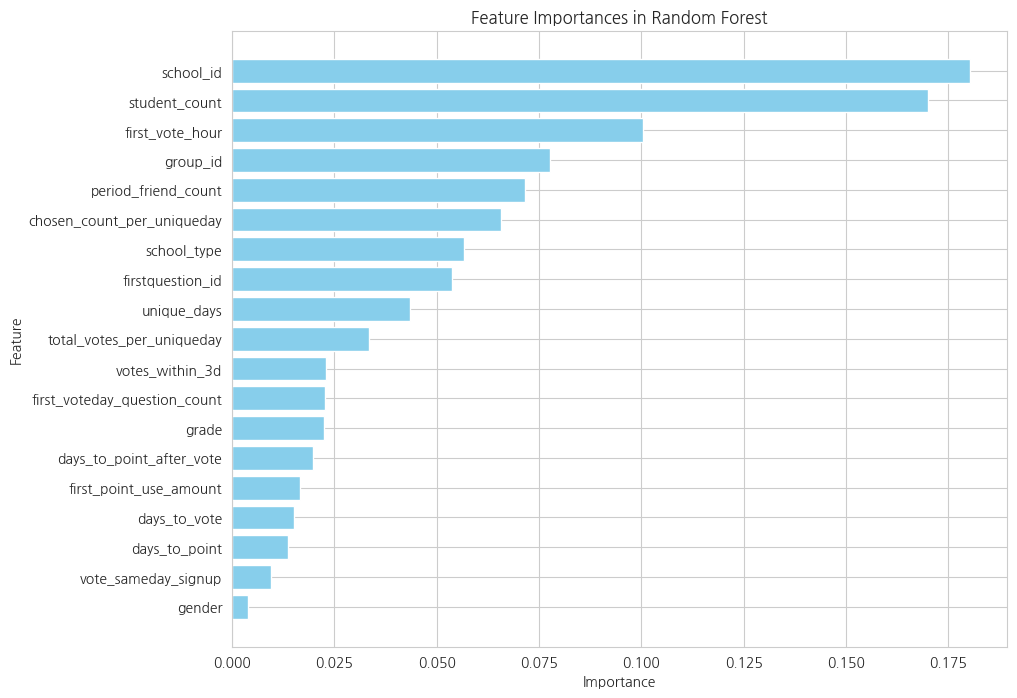

In [97]:
# v6 usertablee
regressor_table = user_table.copy()

# nan 값 및 독립변수로 쓸 수 없는 컬럼 제거
regressor_table = regressor_table.drop(columns=[
    'chosen_count','total_votes','first_vote','cohort_day','active_days']
    ).fillna(0)


y = regressor_table['retention_day8']
X = regressor_table.drop(columns=['retention_day8'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(r2_score(y_test,y_pred))

print("Feature Importances:", rf.feature_importances_)


import matplotlib.pyplot as plt
col_importance = pd.DataFrame({
    'Feature': X.columns,  
    'Importance': rf.feature_importances_
})

# 중요도가 높은 순으로 정렬
col_importance = col_importance.sort_values(by="Importance", ascending=False).reset_index(drop=True)

# 시각화
plt.figure(figsize=(10, 8))
plt.barh(col_importance['Feature'], col_importance['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in Random Forest")
plt.gca().invert_yaxis()  # 중요도가 높은 순으로 정렬
plt.show()


In [99]:
col_importance.to_csv('./feature_importance.csv', index=False)

## 상관분석

/home/project4_machine/project4/google_cloud/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


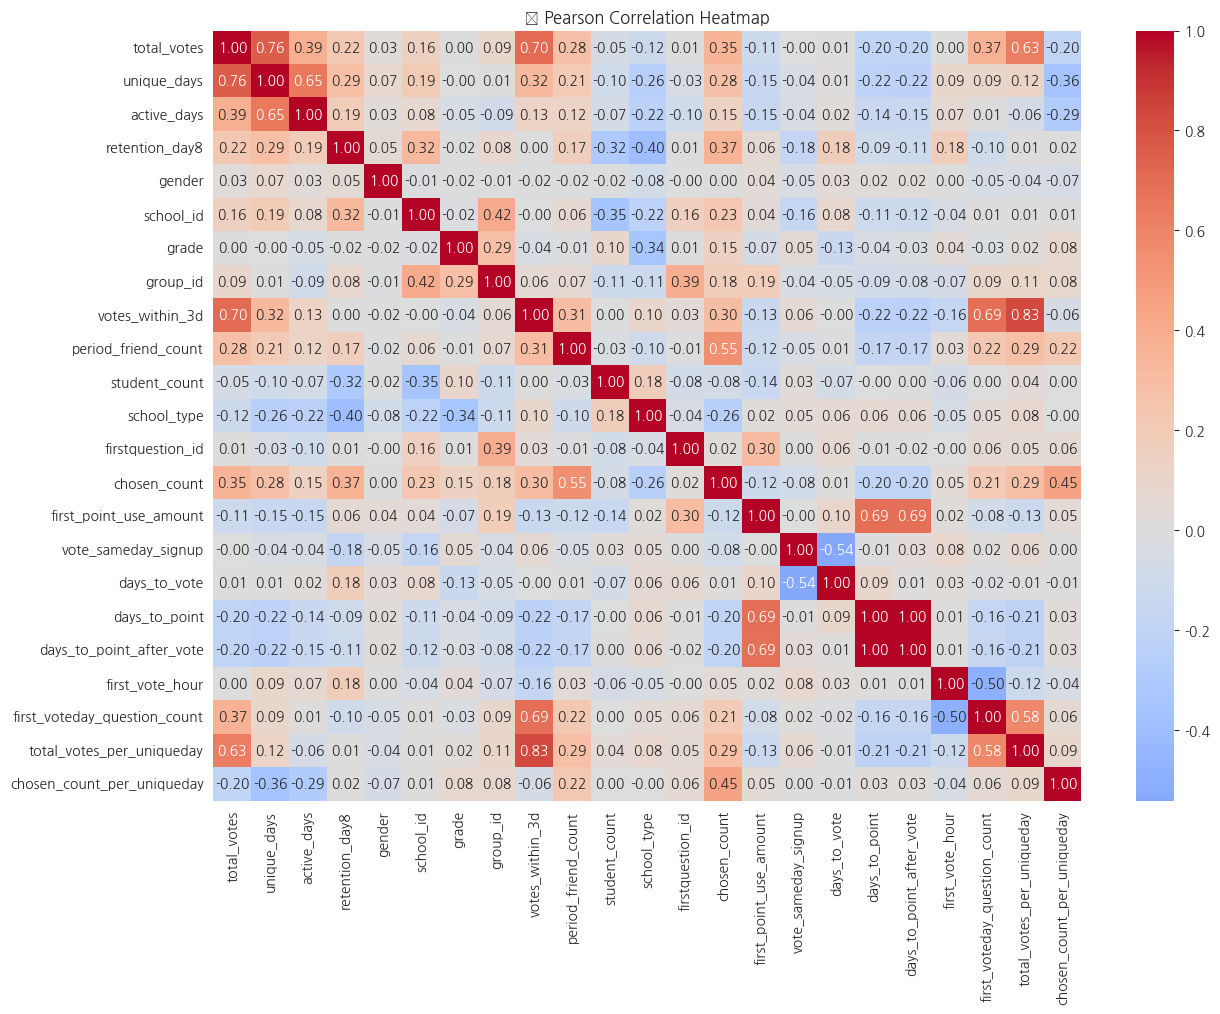

In [58]:
# 전체 히트맵

# 예: df의 연속형 수치 변수들만 대상으로
corr_matrix = user_table.drop(columns=['first_vote','cohort_day']).corr(method='pearson')

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("📊 Pearson Correlation Heatmap")
plt.show()


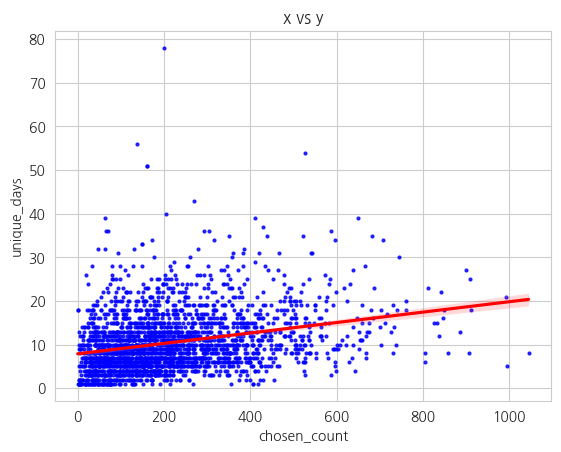

In [ ]:
# v6 상관성 시각화
plt.figure(figsize=(10,6))
sns.regplot(x='chosen_count', y='unique_days', data=user_table, color='red', scatter_kws={'s':4,'color':'blue'})
plt.title('x vs y')
plt.show()

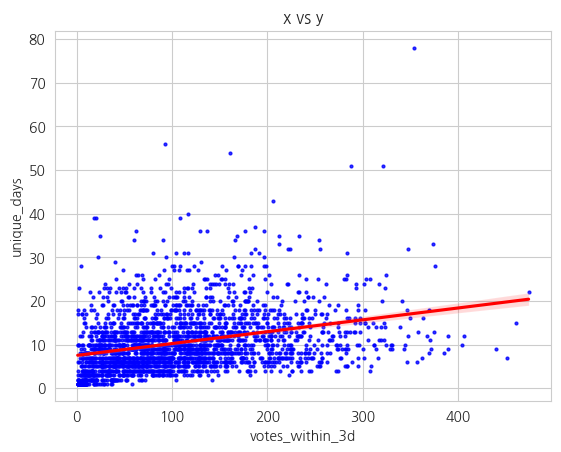

In [ ]:
# v6 상관성 시각화
plt.figure(figsize=(10,6))
sns.regplot(x='votes_within_3d', y='unique_days', data=user_table, color='red', scatter_kws={'s':4,'color':'blue'})
plt.title('x vs y')
plt.show()


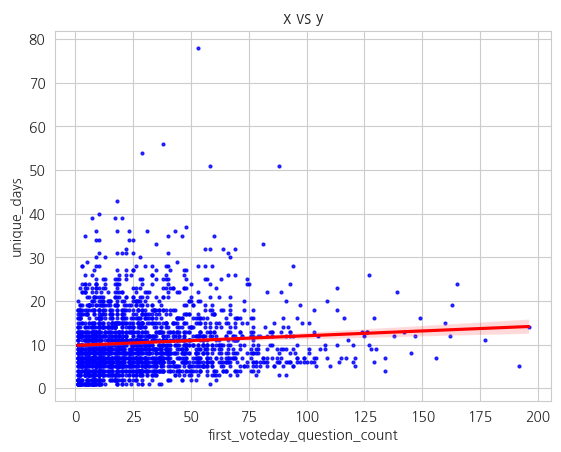

In [ ]:
# v6 상관성 시각화
plt.figure(figsize=(10,6))
sns.regplot(x='first_voteday_question_count', y='unique_days', data=user_table, color='red', scatter_kws={'s':4,'color':'blue'})
plt.title('x vs y')
plt.show()


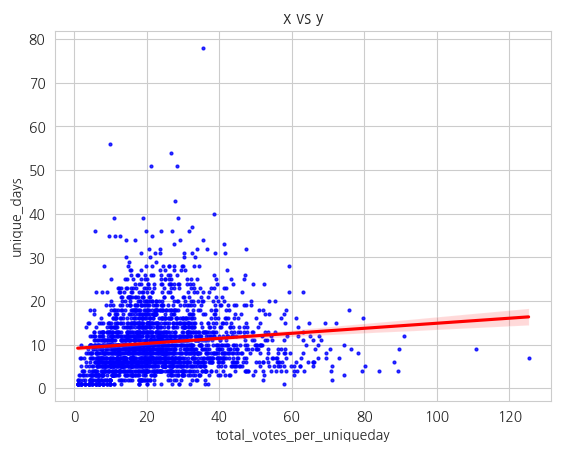

In [ ]:
# v6 상관성 시각화
plt.figure(figsize=(10,6))
sns.regplot(x='total_votes_per_uniqueday', y='unique_days', data=user_table, color='red', scatter_kws={'s':4,'color':'blue'})
plt.title('x vs y')
plt.show()


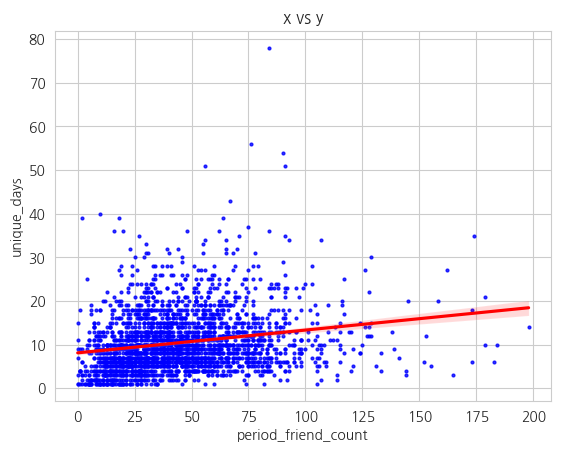

In [ ]:
# v6 상관성 시각화
plt.figure(figsize=(10,6))
sns.regplot(x='period_friend_count', y='unique_days', data=user_table, color='red', scatter_kws={'s':4,'color':'blue'})
plt.title('x vs y')
plt.show()


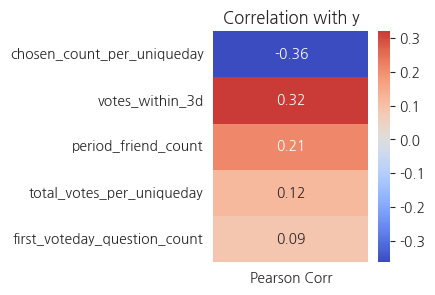

In [64]:
# v6 상관성 피어슨 분석 및 시각화
target_cols = ['unique_days','chosen_count_per_uniqueday', 'votes_within_3d', 'period_friend_count', 'total_votes_per_uniqueday', 'first_voteday_question_count']

# y와의 상관계수만 추출 (y 자신 제외)
corr_with_y = user_table[target_cols].corr(method='pearson')['unique_days'].drop('unique_days').to_frame(name='Pearson Corr')

# 히트맵처럼 세로로 시각화
plt.figure(figsize=(2.5, len(corr_with_y) * 0.6))
sns.heatmap(corr_with_y, annot=True, fmt=".2f", cmap='coolwarm', center=0, cbar=True)

plt.title('Correlation with y')
plt.show()

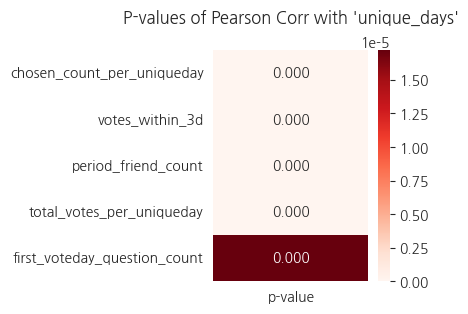

In [65]:
# 피어슨 p_value

p_values = {}
for x in user_table[target_cols].drop(columns='unique_days').columns:
    _, p = pearsonr(user_table[x], user_table['unique_days'])
    p_values[x] = p

# DataFrame으로 정리
pval_df = pd.DataFrame.from_dict(p_values, orient='index', columns=['p-value'])

# 히트맵 시각화
plt.figure(figsize=(2.5, len(pval_df) * 0.6))
sns.heatmap(pval_df, annot=True, fmt=".3f", cmap='Reds', cbar=True)
plt.title(f"P-values of Pearson Corr with 'unique_days'", pad=20)
plt.show()